<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/%22%D0%A2%D0%BE%D1%87%D0%BA%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Идея подхода заключается в том, что бы найти на графиках изменения координат скелетных точек характерные повторяющиеся участки (паттерны, соответствующие фазам удара) и классифицировать (разметить) их.

In [ ]:
# Работа с массивами данных
import numpy as np

#Работа с таблицами
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

# Отрисовка графиков

import matplotlib.pyplot as plt
import logging
logging.disable(level=logging.CRITICAL)


# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_Andriy=MinMaxScaler()
scaler_Max=MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Для анализа выбрано видео_1 неправильной техники удара гедан барай в исполнении Андрея. Боковой ракурс
filename_1='/content/drive/MyDrive/dataset_GB_Andriy_wrong_1_with_features_new.csv'
filename_2='/content/drive/MyDrive/dataset_GB_Maxim_wrong_1_with_features_new.csv'
filename_3='/content/drive/MyDrive/dataset_GB_Andriy_wrong_2_with_features_new.csv'
filename_4='/content/drive/MyDrive/dataset_GB_Maxim_wrong_2_with_features_new.csv'
filename_5='/content/drive/MyDrive/dataset_GB_Andriy_wrong_3_with_features_new.csv'
filename_6='/content/drive/MyDrive/dataset_GB_Maxim_wrong_3_with_features_new.csv'


In [ ]:
df = pd.read_csv(filename_1)
df_Max = pd.read_csv(filename_2)
df_Andr2 = pd.read_csv(filename_3)
df_Max2 = pd.read_csv(filename_4)
df_Andr3 = pd.read_csv(filename_5)
df_Max3 = pd.read_csv(filename_6)

In [ ]:
df[['z_21']] = scaler_Andriy.fit_transform(df[['z_21']])
df

,correct,impact,view,filename,frame#,x_0,y_0,z_0,v_0,x_1,...,z_30,v_30,x_31,y_31,z_31,v_31,x_32,y_32,z_32,v_32
0,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,0,0.408151,0.153001,-0.157211,0.999968,0.404263,...,-0.080152,0.941374,0.517026,0.875796,0.073420,0.980864,0.286560,0.951061,-0.187988,0.994176
1,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,1,0.407528,0.152959,-0.172621,0.999969,0.403937,...,-0.070414,0.940674,0.517695,0.875690,0.082727,0.981055,0.285864,0.950794,-0.180747,0.994069
2,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,2,0.407254,0.152470,-0.162627,0.999969,0.403539,...,-0.057488,0.941733,0.518392,0.875678,0.081335,0.981672,0.285868,0.951502,-0.168709,0.994177
3,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,3,0.407027,0.151670,-0.162385,0.999969,0.403177,...,-0.073338,0.942159,0.518493,0.875251,0.085703,0.981809,0.285864,0.951679,-0.186850,0.994220
4,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,4,0.406768,0.151549,-0.172669,0.999971,0.402904,...,-0.073452,0.943145,0.518552,0.875164,0.067349,0.982383,0.285968,0.951805,-0.187235,0.994332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,556,0.421439,0.164136,-0.100567,0.999850,0.416278,...,-0.105206,0.891193,0.550724,0.870349,0.133874,0.934540,0.299217,0.950251,-0.214737,0.985235
557,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,557,0.420707,0.163390,-0.116454,0.999860,0.415881,...,-0.085194,0.892078,0.550808,0.870336,0.144374,0.936079,0.299597,0.949842,-0.195401,0.985331
558,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,558,0.420184,0.160999,-0.115043,0.999870,0.415414,...,-0.152328,0.896706,0.551060,0.870329,0.196249,0.937353,0.300084,0.949986,-0.266206,0.986119
559,wrong,gedan_barai,gedan_barai_side_view_wrong,Andriy_gedan_barai_wrong_side_view1,559,0.419994,0.157644,-0.116428,0.999868,0.414961,...,-0.144963,0.897373,0.551009,0.870320,0.173230,0.937145,0.300305,0.949927,-0.259242,0.986195


In [ ]:
df_Max[['z_21']] = scaler_Max.fit_transform(df_Max[['z_21']])
df_Max

,correct,impact,view,filename,frame#,x_0,y_0,z_0,v_0,x_1,...,z_30,v_30,x_31,y_31,z_31,v_31,x_32,y_32,z_32,v_32
0,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,0,0.508712,0.104731,-0.467441,0.999972,0.511555,...,0.011327,0.851853,0.780648,0.868711,0.091641,0.963081,0.237667,0.934587,-0.218317,0.978163
1,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,1,0.509442,0.104246,-0.475680,0.999971,0.511795,...,0.075548,0.851977,0.781506,0.868516,0.059725,0.963795,0.237347,0.933894,-0.148252,0.977736
2,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,2,0.512032,0.099340,-0.477954,0.999972,0.514832,...,0.056096,0.851030,0.786010,0.867765,0.066405,0.963954,0.243670,0.931442,-0.170872,0.977379
3,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,3,0.636384,0.103807,-0.402682,0.999975,0.636169,...,-0.279761,0.859793,0.866749,0.867449,0.011549,0.963767,0.102790,0.922069,-0.496383,0.978847
4,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,4,0.654076,0.106145,-0.425024,0.999977,0.656768,...,-0.246646,0.869080,0.870026,0.867386,-0.020083,0.964711,0.080794,0.918458,-0.474996,0.980422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,548,0.602331,0.107513,-0.203843,0.999715,0.603436,...,-0.310294,0.830283,0.840137,0.846046,0.022424,0.874730,0.188361,0.923257,-0.503306,0.967438
549,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,549,0.606114,0.107618,-0.242771,0.999739,0.606942,...,-0.279060,0.826189,0.864985,0.848080,0.052817,0.860661,0.163373,0.923420,-0.474584,0.966076
550,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,550,0.603208,0.108095,-0.300357,0.999765,0.603675,...,-0.308498,0.828160,0.887083,0.854367,0.064222,0.856804,0.140166,0.923508,-0.505890,0.966080
551,wrong,gedan_barai,gedan_barai_side_view_wrong,Maksim_gedan_barai_side_view_wrong_1,551,0.611345,0.110198,-0.395163,0.999789,0.611798,...,-0.312163,0.838795,0.880721,0.856596,0.086462,0.863738,0.125779,0.920185,-0.514315,0.968300


In [ ]:
# Размытие с помощью EMA
def ema_smooth(y, alpha):
    smoothed = np.zeros_like(y)
    for i in range(len(y)):
        if i == 0:
            smoothed[i] = y[i]
        else:
            smoothed[i] = alpha * y[i] + (1 - alpha) * smoothed[i - 1]
    return smoothed

# Растяжение для обнаружения пиков
def peak_stretch(y, window_size):
    stretched = np.zeros_like(y)
    for i in range(len(y)):
        start = max(0, i - window_size)
        end = min(len(y) - 1, i + window_size)
        max_val = max(y[start:end])
        stretched[i] = max_val
    return stretched

# Установка параметров и выполнение алгоритма SAS



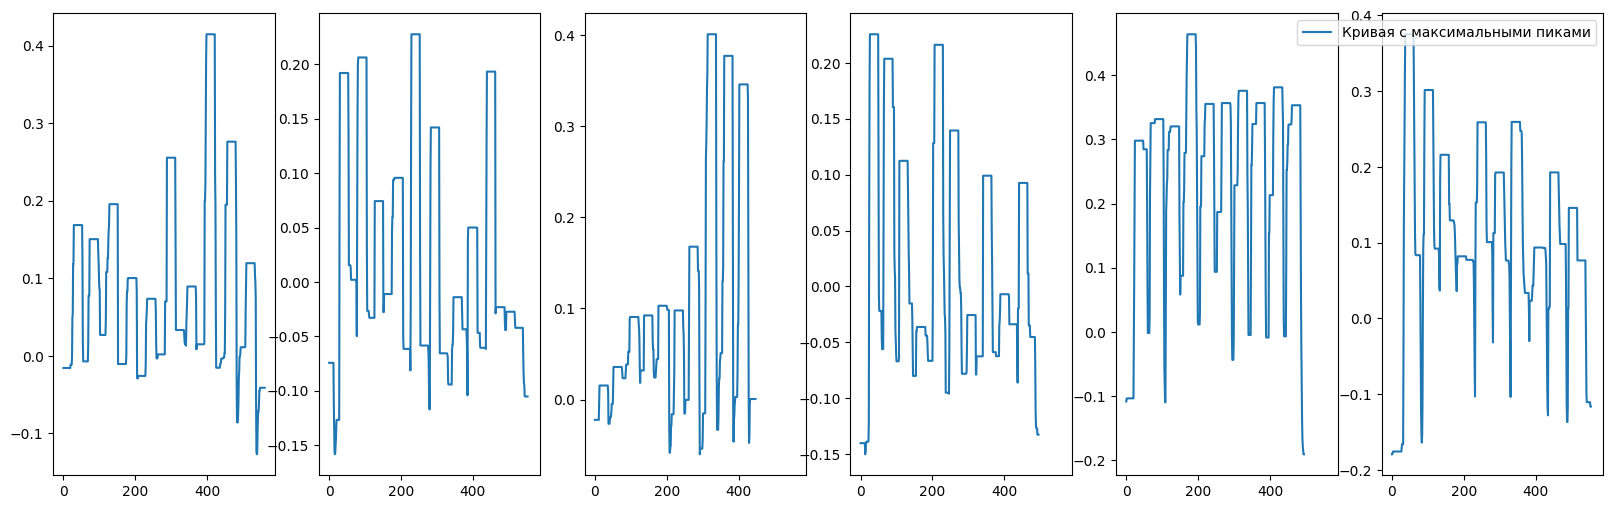

In [ ]:
x=df['frame#']
y=df['z_21']
x_Max=df_Max['frame#']
y_Max=df_Max['z_21']
x_Andr2=df_Andr2['frame#']
y_Andr2=df_Andr2['z_21']
x_Max2=df_Max2['frame#']
y_Max2=df_Max2['z_21']
x_Andr3=df_Andr3['frame#']
y_Andr3=df_Andr3['z_21']
x_Max3=df_Max3['frame#']
y_Max3=df_Max3['z_21']
alpha = 0.5  # параметр размытия EMA
window_size = 12  # размер окна для растяжения

smoothed = ema_smooth(y, alpha)
smoothed_Max = ema_smooth(y_Max, alpha)
smoothed_Andr2 = ema_smooth(y_Andr2, alpha)
smoothed_Max2 = ema_smooth(y_Max2, alpha)
smoothed_Andr3 = ema_smooth(y_Andr3, alpha)
smoothed_Max3 = ema_smooth(y_Max3, alpha)
peaks = peak_stretch(smoothed, window_size)
peaks_max = peak_stretch(smoothed_Max, window_size)
peaks_andr = peak_stretch(smoothed_Andr2, window_size)
peaks_max2 = peak_stretch(smoothed_Max2, window_size)
peaks_andr3 = peak_stretch(smoothed_Andr3, window_size)
peaks_max3 = peak_stretch(smoothed_Max3, window_size)


# Отображение результатов
fig, (a0, a1, a2, a3, a4, a5) = plt.subplots(nrows=1, ncols=6, sharex=True,
                                    figsize=(20, 6))
a0.plot(x, peaks, label='Кривая с максимальными пиками')
a1.plot(x_Max, peaks_max, label='Кривая с максимальными пиками')
a2.plot(x_Andr2, peaks_andr, label='Кривая с максимальными пиками')
a3.plot(x_Max2, peaks_max2, label='Кривая с максимальными пиками')
a4.plot(x_Andr3, peaks_andr3, label='Кривая с максимальными пиками')
a5.plot(x_Max3, peaks_max3, label='Кривая с максимальными пиками')
# plt.figure(figsize=(10, 5))
# # plt.plot(x, y, label='Исходная кривая')
# # plt.plot(x, smoothed, label='Размытая кривая')
# plt.plot(x, peaks, label='Кривая с максимальными пиками')
# plt.legend()
# plt.show()
# plt.figure(figsize=(10, 5))
# # plt.plot(x, y, label='Исходная кривая')
# # plt.plot(x, smoothed, label='Размытая кривая')
# plt.plot(x_Max, peaks_max, label='Кривая с максимальными пиками')
plt.legend()
plt.show()

In [ ]:
#Такую формулу для рассчета параметра distance в функции find_peaks() я применил
repeats=10 #число повторений удара на видео
pnts=3 #количество точек в отдельном паттерне
dist=int((df.shape[0]/repeats)/pnts)
dist
dist_Max=int((df_Max.shape[0]/repeats)/pnts)

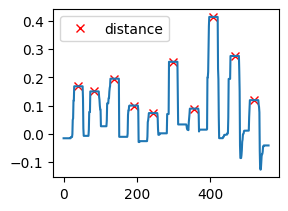

In [ ]:
#Вычисляем пики для z_21 с помощью библиотеки scipy.signal
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks

# x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + np.random.normal(0, 1, 1000) * 0.15
x_Andr1 = peaks #df['z_21']
peaks_1, _ = find_peaks(x_Andr1, distance=18)
# peaks2, _ = find_peaks(x, prominence=1)      # BEST!
# peaks3, _ = find_peaks(x, width=28)
# peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks_1, x_Andr1[peaks_1], "xr"); plt.plot(x_Andr1); plt.legend(['distance'])
# plt.subplot(2, 2, 2)
# plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
# plt.subplot(2, 2, 3)
# plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])
# plt.subplot(2, 2, 4)
# plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()



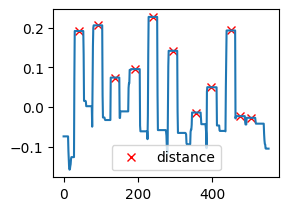

In [ ]:
x_MaxPeaks =peaks_max #df_Max['z_21'][-561:]
peaks_2, _ = find_peaks(x_MaxPeaks, distance=18)
plt.subplot(2, 2, 1)
plt.plot(peaks_2, x_MaxPeaks[peaks_2], "xr"); plt.plot(x_MaxPeaks); plt.legend(['distance'])
plt.show()

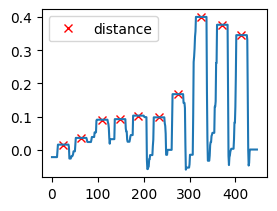

In [ ]:
x_Andr2Peaks =peaks_andr #df_Max['z_21'][-561:]
peaks_3, _ = find_peaks(x_Andr2Peaks, distance=18)
plt.subplot(2, 2, 1)
plt.plot(peaks_3, x_Andr2Peaks[peaks_3], "xr"); plt.plot(x_Andr2Peaks); plt.legend(['distance'])
plt.show()

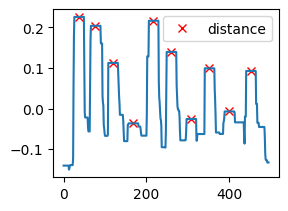

In [ ]:
x_Max2Peaks =peaks_max2 #df_Max['z_21'][-561:]
peaks_4, _ = find_peaks(x_Max2Peaks, distance=18)
plt.subplot(2, 2, 1)
plt.plot(peaks_4, x_Max2Peaks[peaks_4], "xr"); plt.plot(x_Max2Peaks); plt.legend(['distance'])
plt.show()

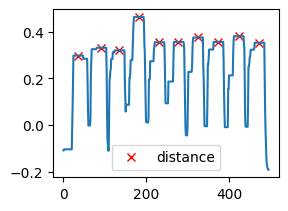

In [ ]:
x_Andr3Peaks =peaks_andr3 #df_Max['z_21'][-561:]
peaks_5, _ = find_peaks(x_Andr3Peaks, distance=18)
plt.subplot(2, 2, 1)
plt.plot(peaks_5, x_Andr3Peaks[peaks_5], "xr"); plt.plot(x_Andr3Peaks); plt.legend(['distance'])
plt.show()

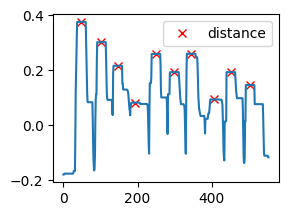

In [ ]:
x_Max3Peaks =peaks_max3 #df_Max['z_21'][-561:]
peaks_6, _ = find_peaks(x_Max3Peaks, distance=18)
plt.subplot(2, 2, 1)
plt.plot(peaks_6, x_Max3Peaks[peaks_6], "xr"); plt.plot(x_Max3Peaks); plt.legend(['distance'])
plt.show()

In [ ]:
dist_Max

18

In [ ]:
peaks_1

array([ 40,  84, 139, 191, 244, 299, 356, 409, 467, 520])

In [ ]:
peaks_2

array([ 41,  92, 138, 193, 240, 294, 357, 398, 450, 476, 504])

In [ ]:
peaks_3

array([ 24,  63, 109, 148, 188, 233, 274, 325, 371, 413])

In [ ]:
peaks_4

array([ 37,  77, 119, 168, 217, 260, 308, 352, 400, 452])

In [ ]:
peaks_5

array([ 35,  91, 135, 181, 231, 277, 324, 373, 422, 472])

In [ ]:
peaks_6

array([ 48, 102, 146, 194, 249, 299, 344, 407, 451, 503])

In [ ]:
#Сегментируем датасет по выбранным пиковым точкам и записываем сегменты в коллекцию
df_collection={}
for i in range(len(peaks_1)-1):
 df_collection.update({i:df[peaks_1[i]:(peaks_1[i+1]+1)]})
dfMax_collection={}
for i in range(len(peaks_2)-1):
 dfMax_collection.update({i:df_Max[peaks_2[i]:(peaks_2[i+1]+1)]})
dfAndr2_collection={}
for i in range(len(peaks_3)-1):
 dfAndr2_collection.update({i:df_Andr2[peaks_3[i]:(peaks_3[i+1]+1)]})
dfMax2_collection={}
for i in range(len(peaks_4)-1):
 dfMax2_collection.update({i:df_Max2[peaks_4[i]:(peaks_4[i+1]+1)]})
dfAndr3_collection={}
for i in range(len(peaks_5)-1):
 dfAndr3_collection.update({i:df_Andr3[peaks_5[i]:(peaks_5[i+1]+1)]})
dfMax3_collection={}
for i in range(len(peaks_6)-1):
 dfMax3_collection.update({i:df_Max2[peaks_6[i]:(peaks_6[i+1]+1)]})

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

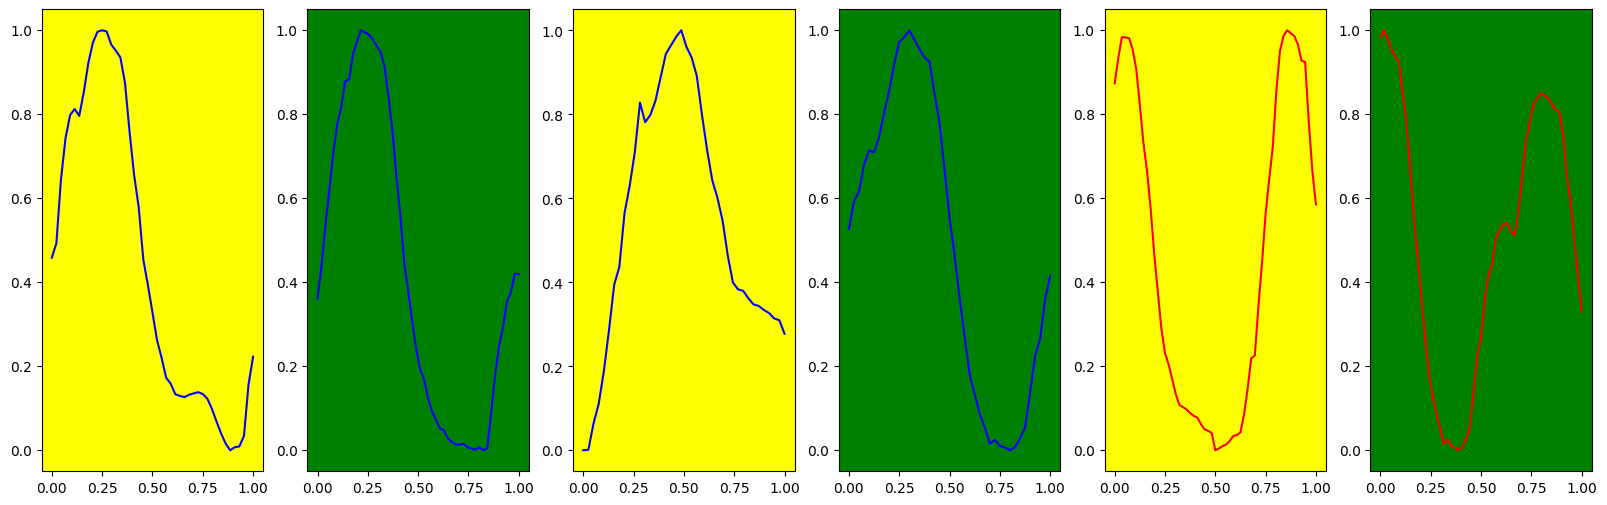

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

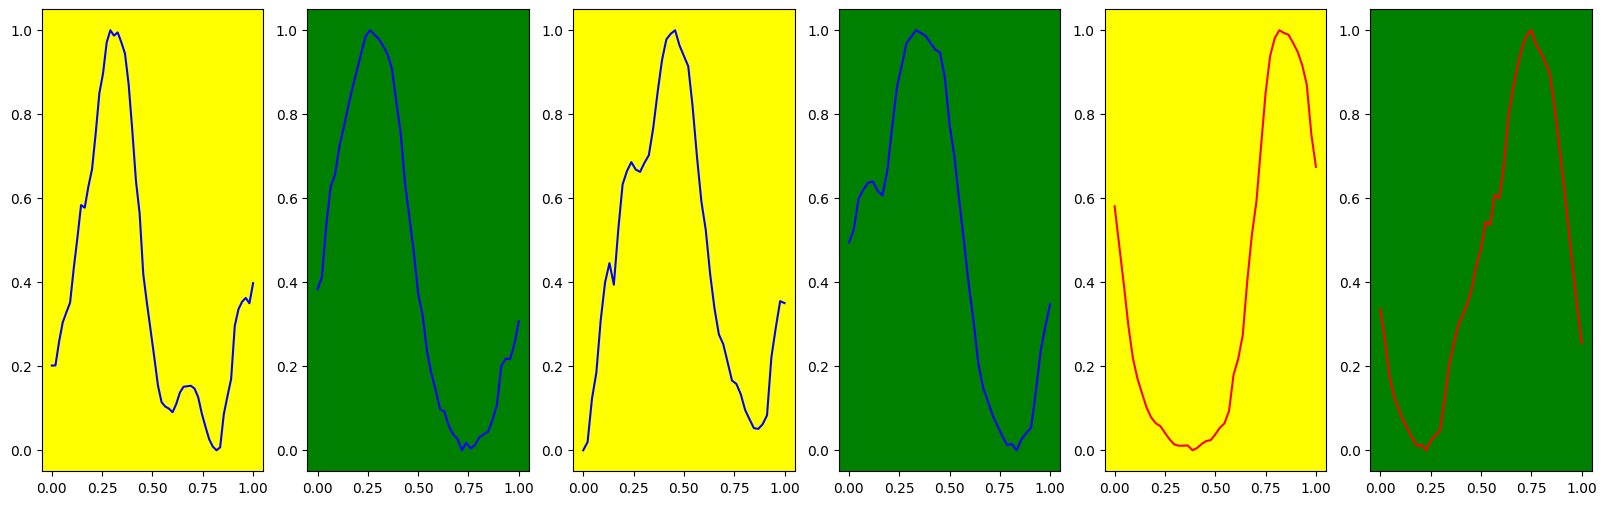

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

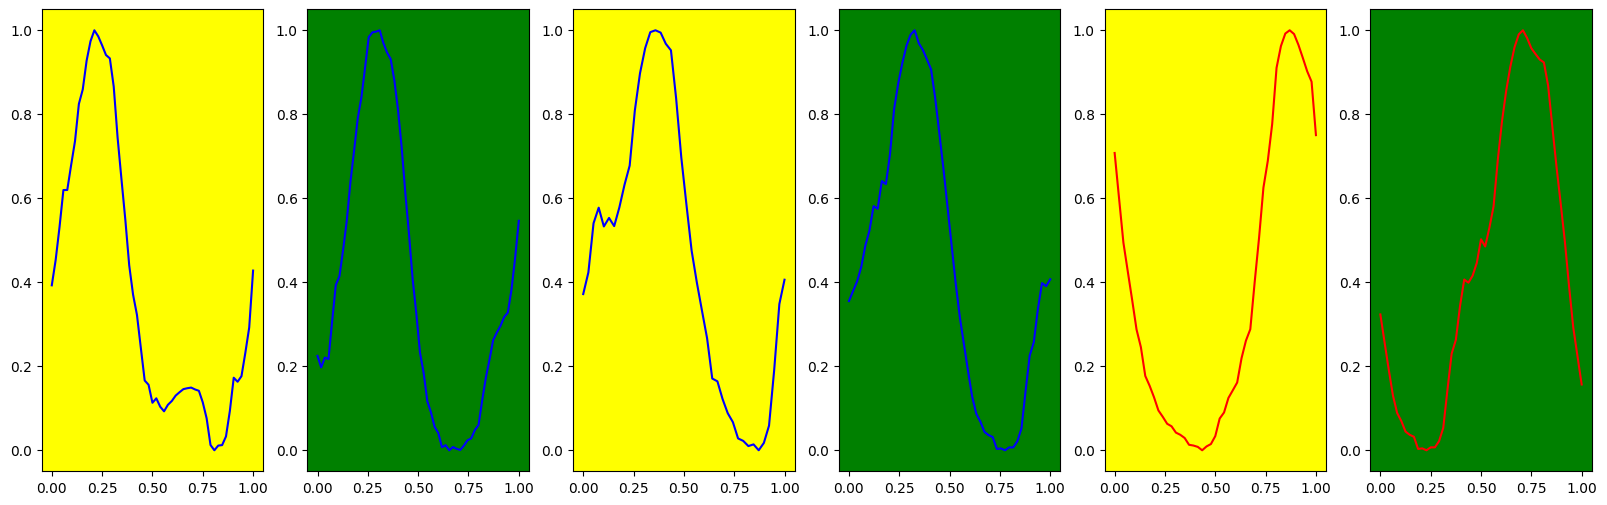

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

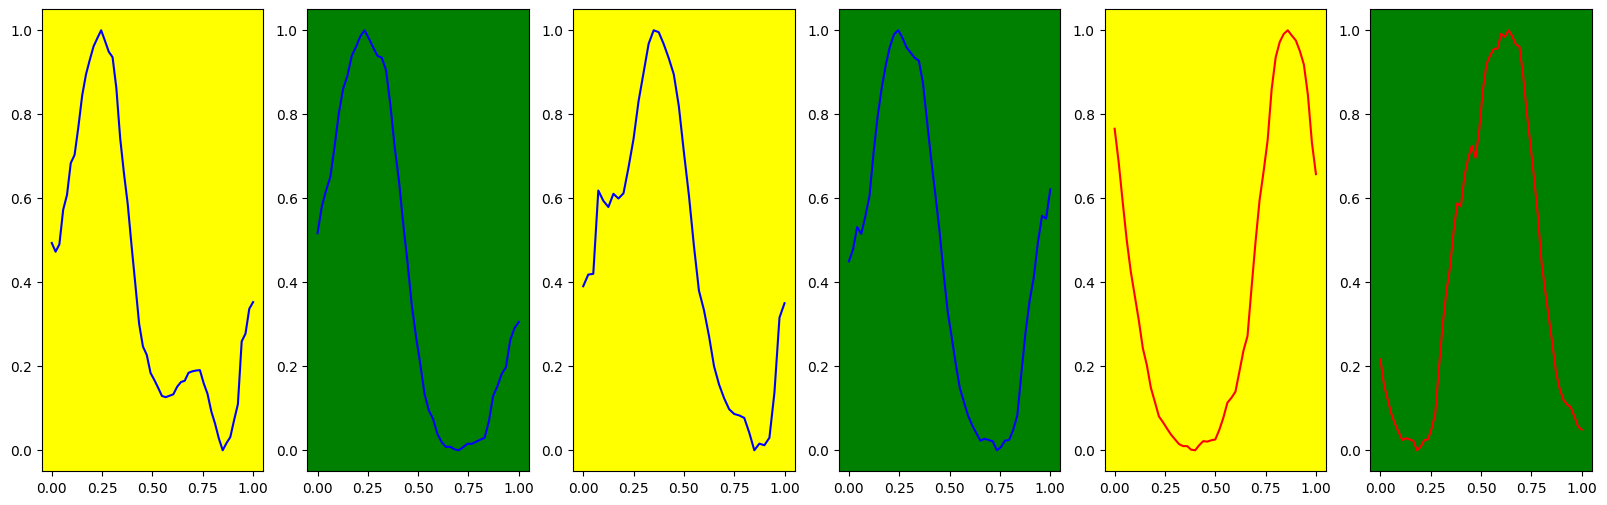

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

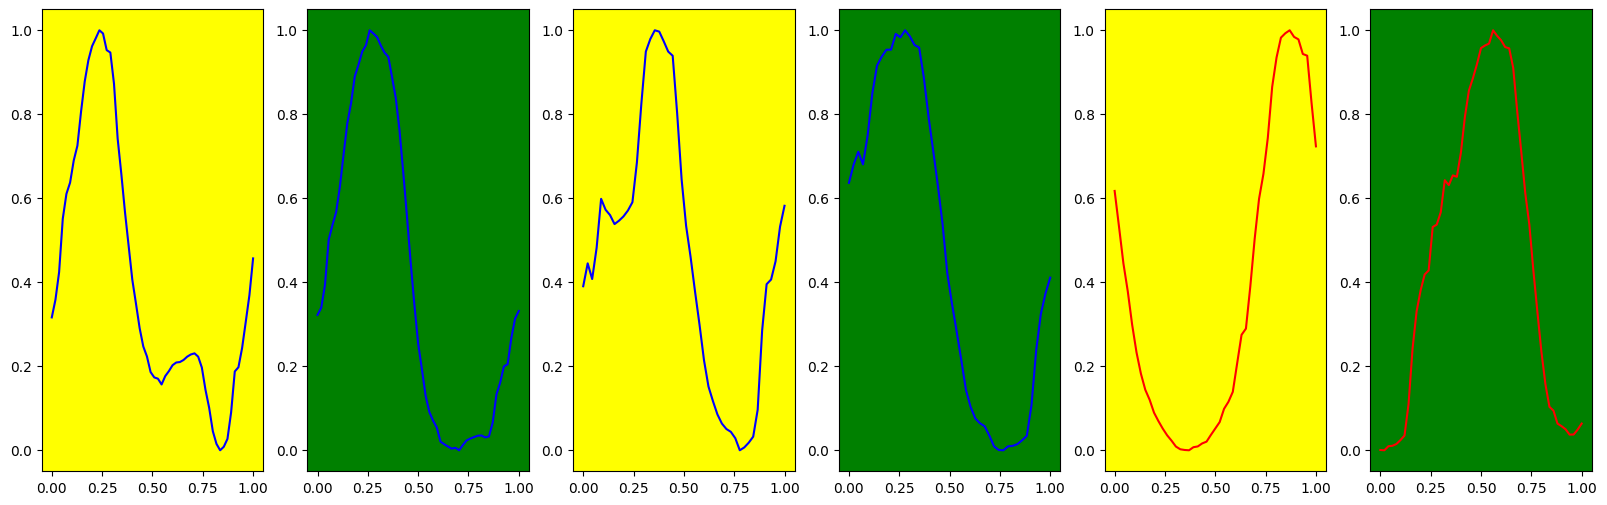

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

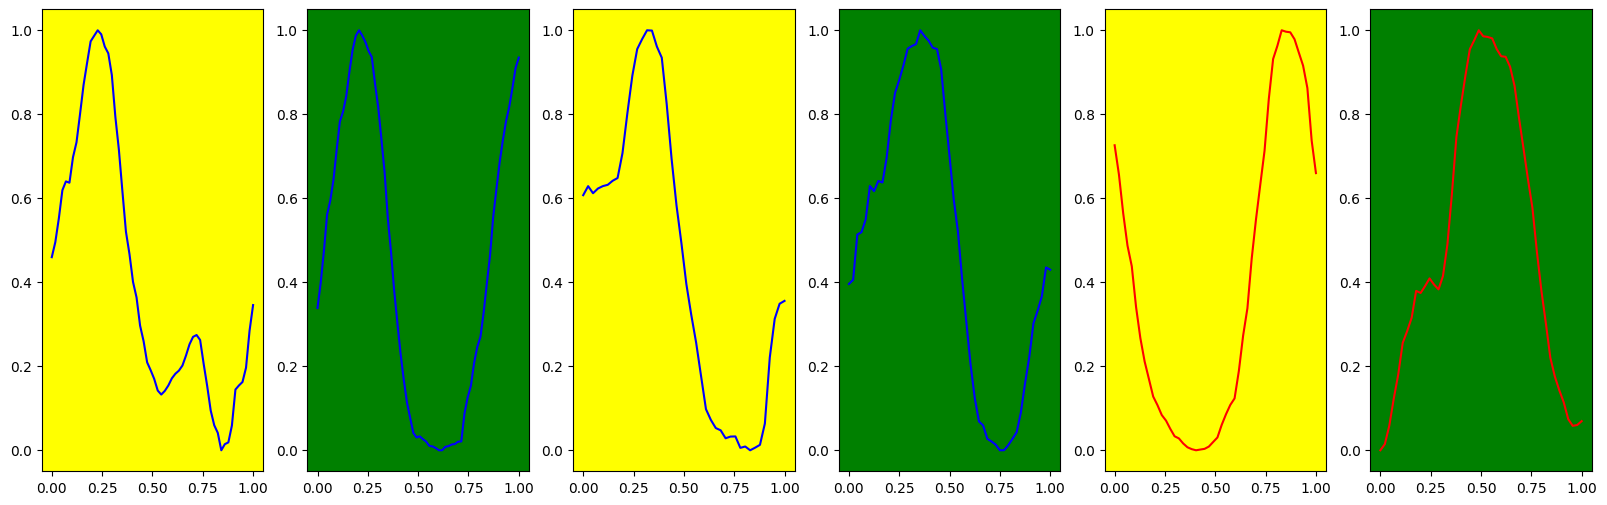

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

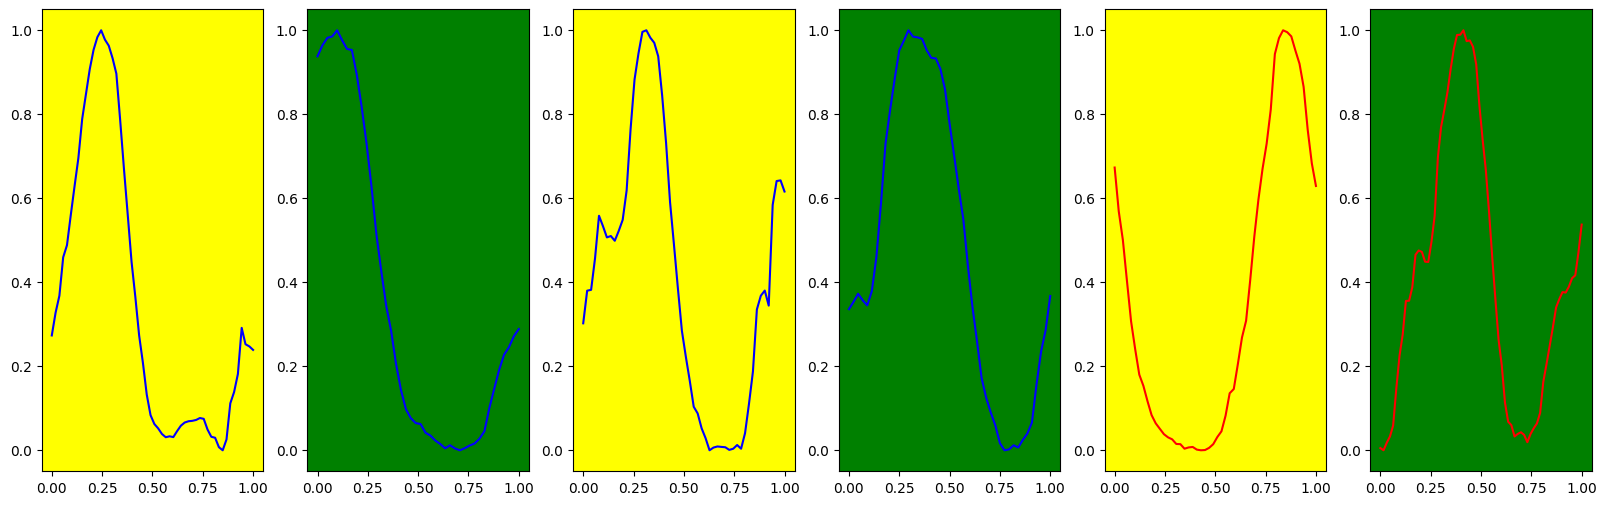

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

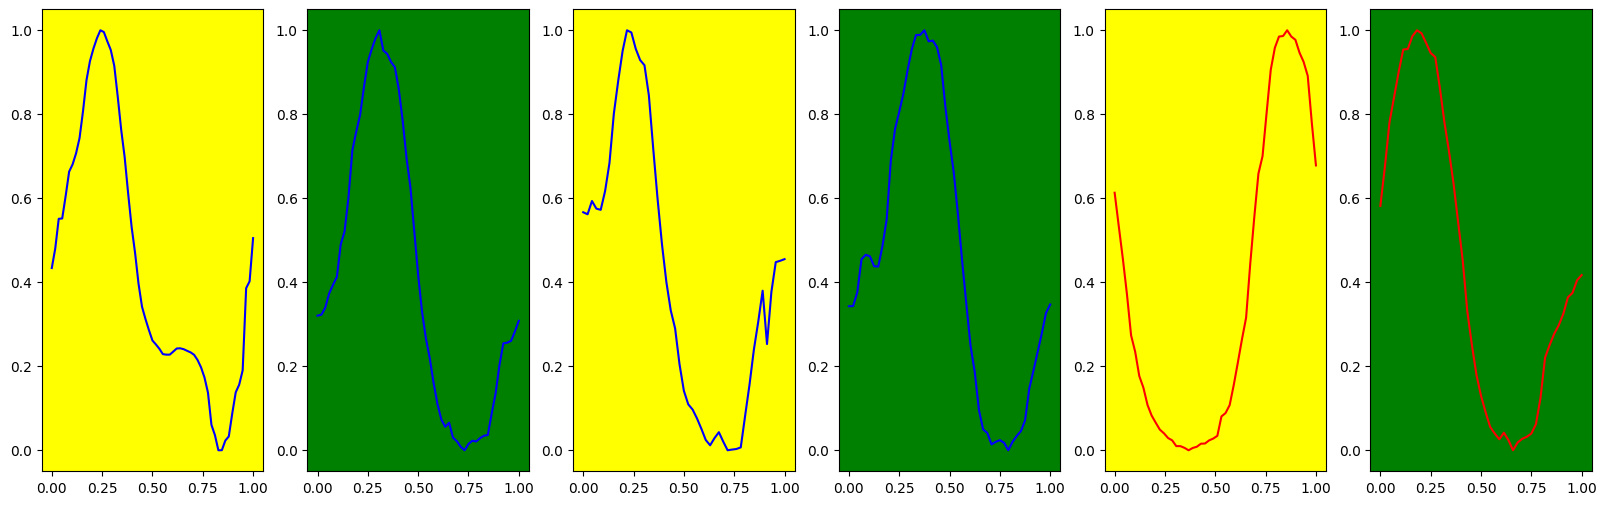

<ipython-input-27-291046138300>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-27-291046138300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-27-291046138300>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

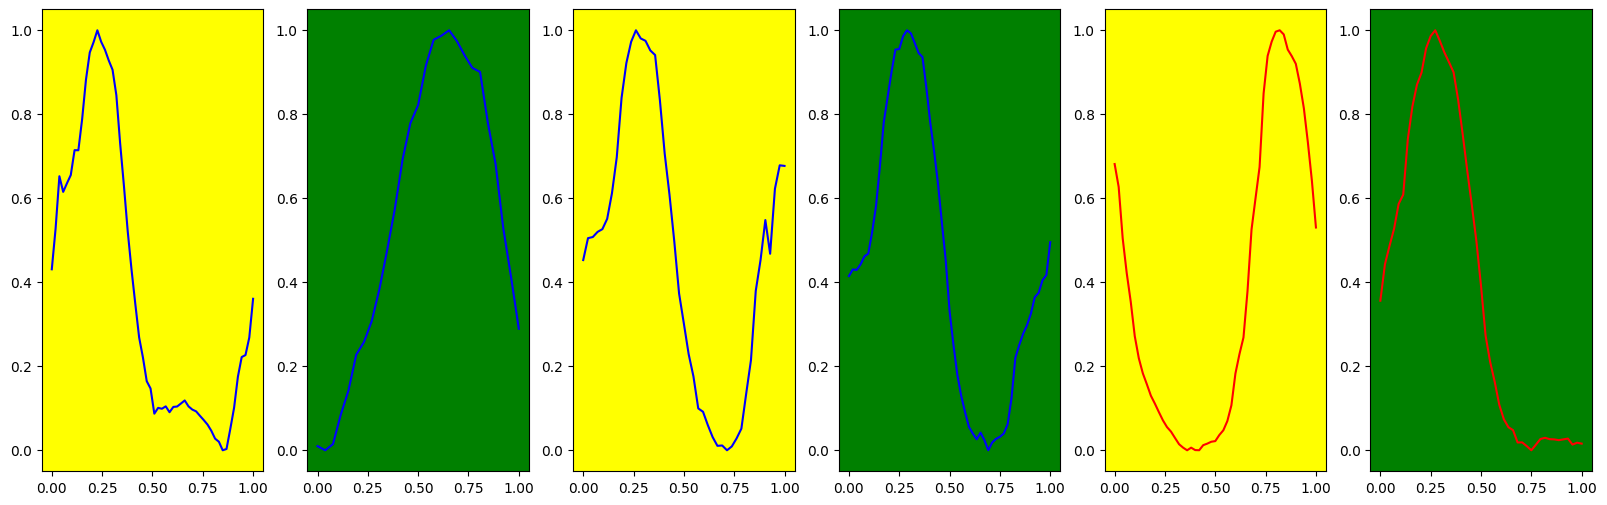

In [ ]:
vect='x_12'
#Вывод каждого повторения
for i in range(len(df_collection)):
 scaler = MinMaxScaler()
 scalerH = MinMaxScaler()
 scaler1 = MinMaxScaler()
 scaler1H = MinMaxScaler()
 scaler2 = MinMaxScaler()
 scaler2H = MinMaxScaler()
 scaler3 = MinMaxScaler()
 scaler3H = MinMaxScaler()
 scaler4 = MinMaxScaler()
 scaler4H = MinMaxScaler()
 scaler5 = MinMaxScaler()
 scaler5H = MinMaxScaler()




 df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
 df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
#  df_collection.get(i).plot(x='frame#', y=[
#                       vect])
#  plt.title('Повторение_'+str((i+2)))
#  plt.show()
 dfMax_collection.get(i)[['frame#']]=scaler1.fit_transform(dfMax_collection.get(i)[['frame#']])
 dfMax_collection.get(i)[[vect]]=scaler1H.fit_transform(dfMax_collection.get(i)[[vect]])

 dfAndr2_collection.get(i)[['frame#']]=scaler2.fit_transform(dfAndr2_collection.get(i)[['frame#']])
 dfAndr2_collection.get(i)[[vect]]=scaler2H.fit_transform(dfAndr2_collection.get(i)[[vect]])

 dfMax2_collection.get(i)[['frame#']]=scaler3.fit_transform(dfMax2_collection.get(i)[['frame#']])
 dfMax2_collection.get(i)[[vect]]=scaler3H.fit_transform(dfMax2_collection.get(i)[[vect]])

 dfAndr3_collection.get(i)[['frame#']]=scaler4.fit_transform(dfAndr3_collection.get(i)[['frame#']])
 dfAndr3_collection.get(i)[[vect]]=scaler4H.fit_transform(dfAndr3_collection.get(i)[[vect]])

 dfMax3_collection.get(i)[['frame#']]=scaler5.fit_transform(dfMax3_collection.get(i)[['frame#']])
 dfMax3_collection.get(i)[[vect]]=scaler5H.fit_transform(dfMax3_collection.get(i)[[vect]])


#  dfMax_collection.get(i).plot(x='frame#', y=[
#                       vect])
 fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, sharex=False,
                                    figsize=(20, 6))
 ax0.plot(df_collection.get(i)['frame#'].to_numpy(),df_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 1')
 ax0.set_facecolor("yellow")
 ax1.plot(dfMax_collection.get(i)['frame#'].to_numpy(), dfMax_collection.get(i)[vect].to_numpy(),  c='blue', label='Повторение_'+str((i+2))+' Максим 1')
 ax1.set_facecolor("green")
 ax2.plot(dfAndr2_collection.get(i)['frame#'].to_numpy(), dfAndr2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 2')
 ax2.set_facecolor("yellow")
 ax3.plot(dfMax2_collection.get(i)['frame#'].to_numpy(), dfMax2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Максим 2')
 ax3.set_facecolor("green")
 ax4.plot(dfAndr3_collection.get(i)['frame#'].to_numpy(), dfAndr3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Андрей 3')
 ax4.set_facecolor("yellow")
 ax5.plot(dfMax3_collection.get(i)['frame#'].to_numpy(), dfMax3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Максим 3')
 ax5.set_facecolor("green")
#  plt.title('Повторение_'+str((i+2)))
 plt.show()

In [ ]:
#Сегментируем датасет по выбранным пиковым точкам и записываем сегменты в коллекцию
df_collection={}
for i in range(len(peaks_1)-1):
 df_collection.update({i:df[peaks_1[i]:(peaks_1[i+1]+1)]})
dfMax_collection={}
for i in range(len(peaks_2)-1):
 dfMax_collection.update({i:df_Max[peaks_2[i]:(peaks_2[i+1]+1)]})
dfAndr2_collection={}
for i in range(len(peaks_3)-1):
 dfAndr2_collection.update({i:df_Andr2[peaks_3[i]:(peaks_3[i+1]+1)]})
dfMax2_collection={}
for i in range(len(peaks_4)-1):
 dfMax2_collection.update({i:df_Max2[peaks_4[i]:(peaks_4[i+1]+1)]})
dfAndr3_collection={}
for i in range(len(peaks_5)-1):
 dfAndr3_collection.update({i:df_Andr3[peaks_5[i]:(peaks_5[i+1]+1)]})
dfMax3_collection={}
for i in range(len(peaks_6)-1):
 dfMax3_collection.update({i:df_Max2[peaks_6[i]:(peaks_6[i+1]+1)]})

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

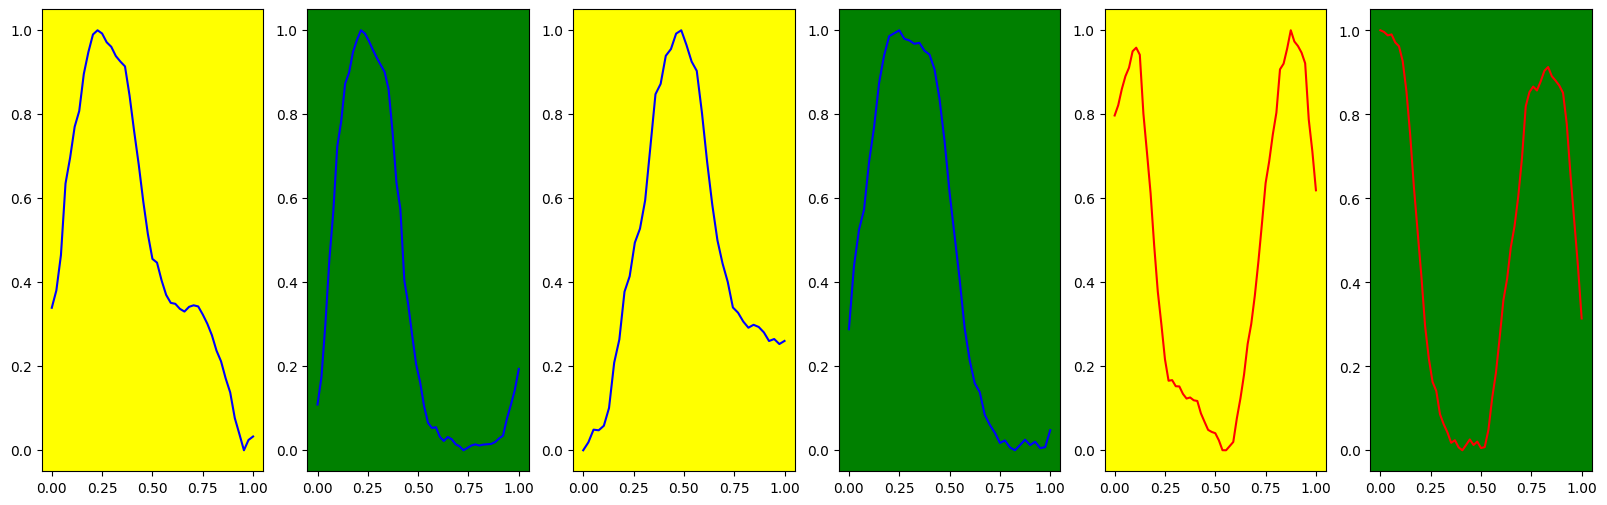

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

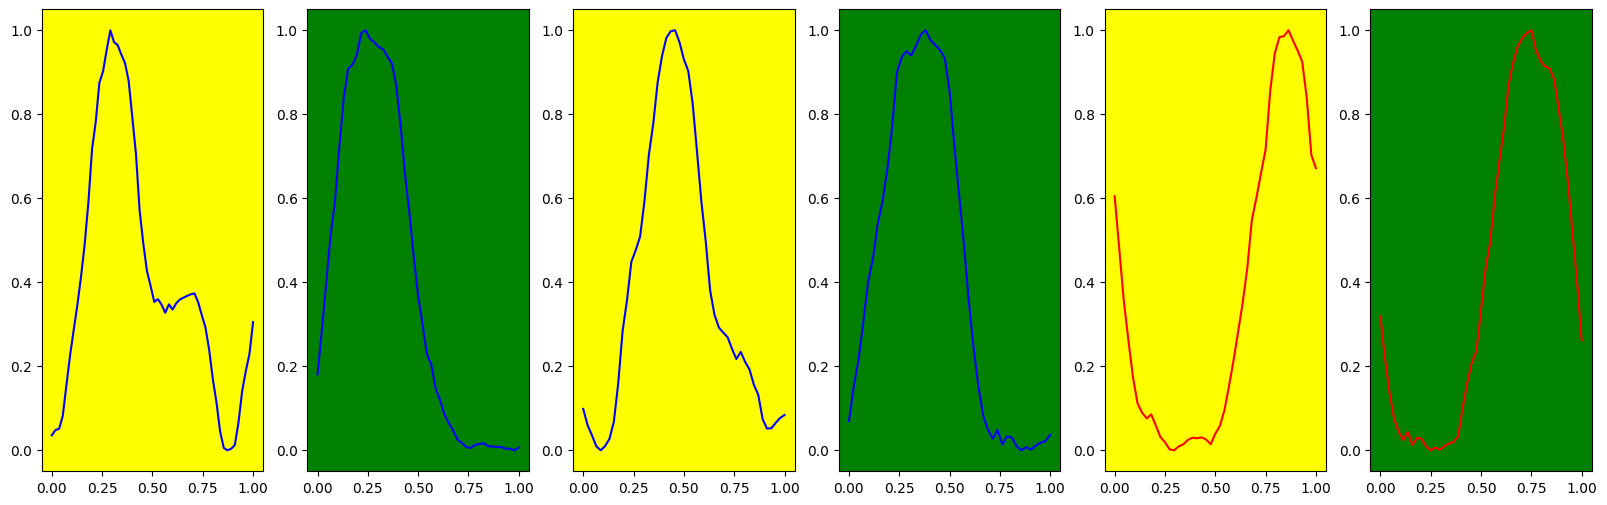

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

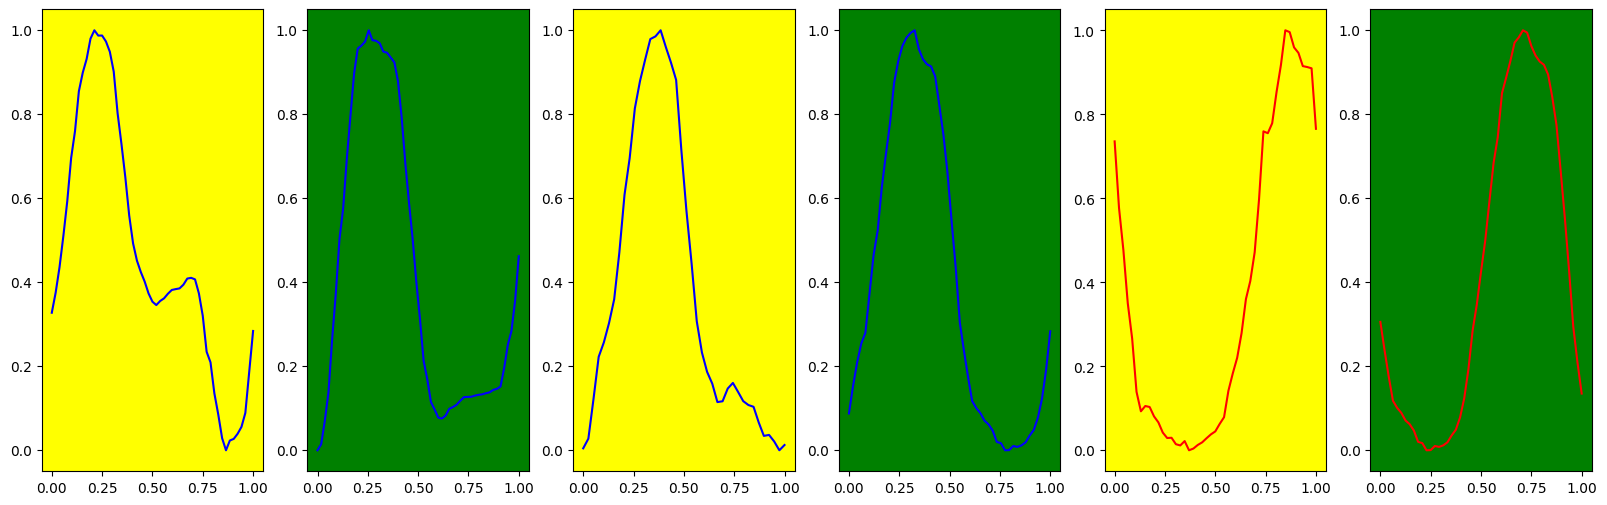

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

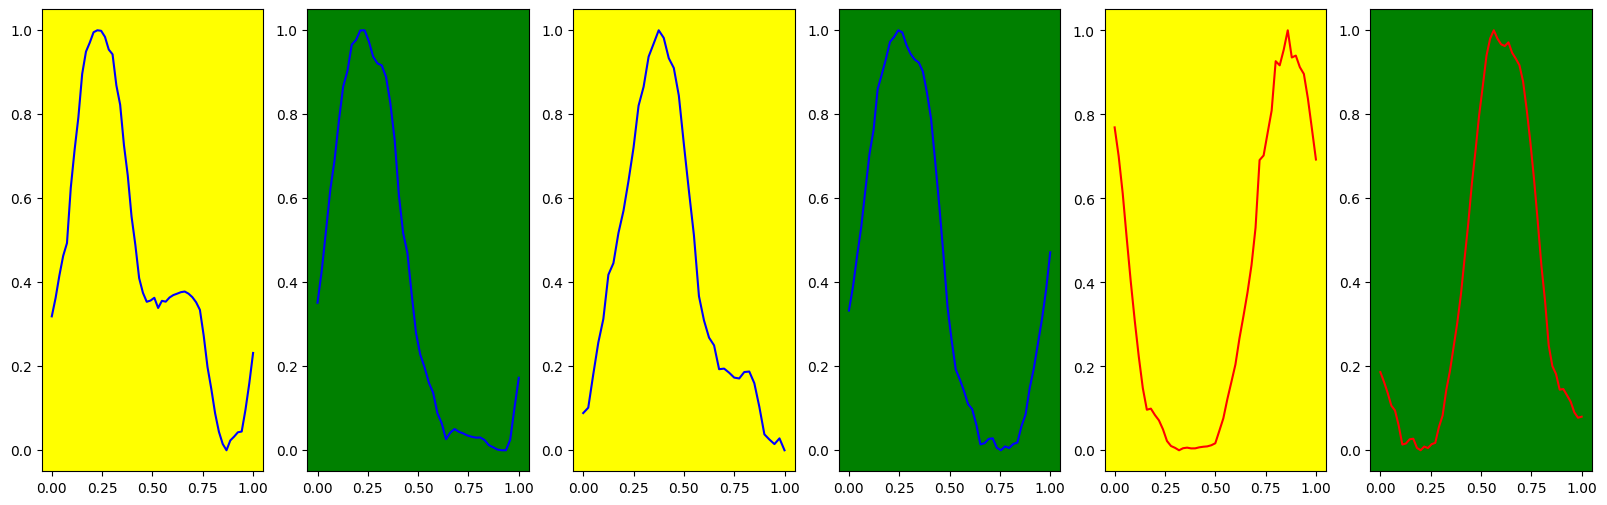

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

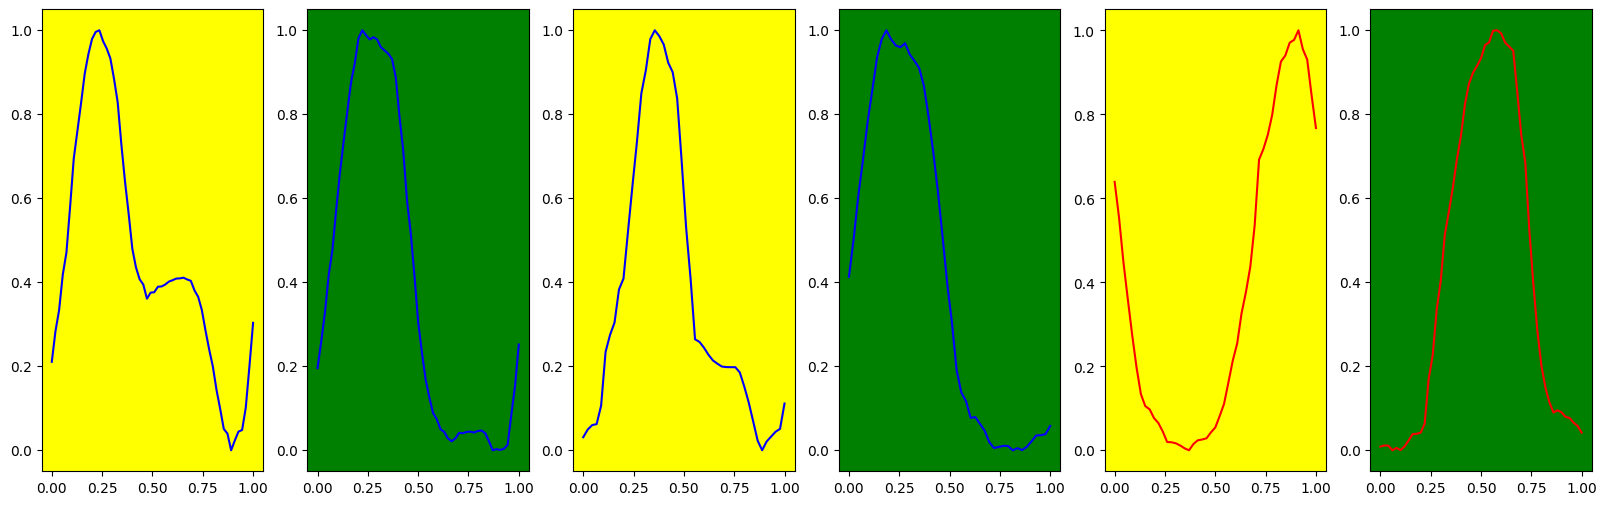

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

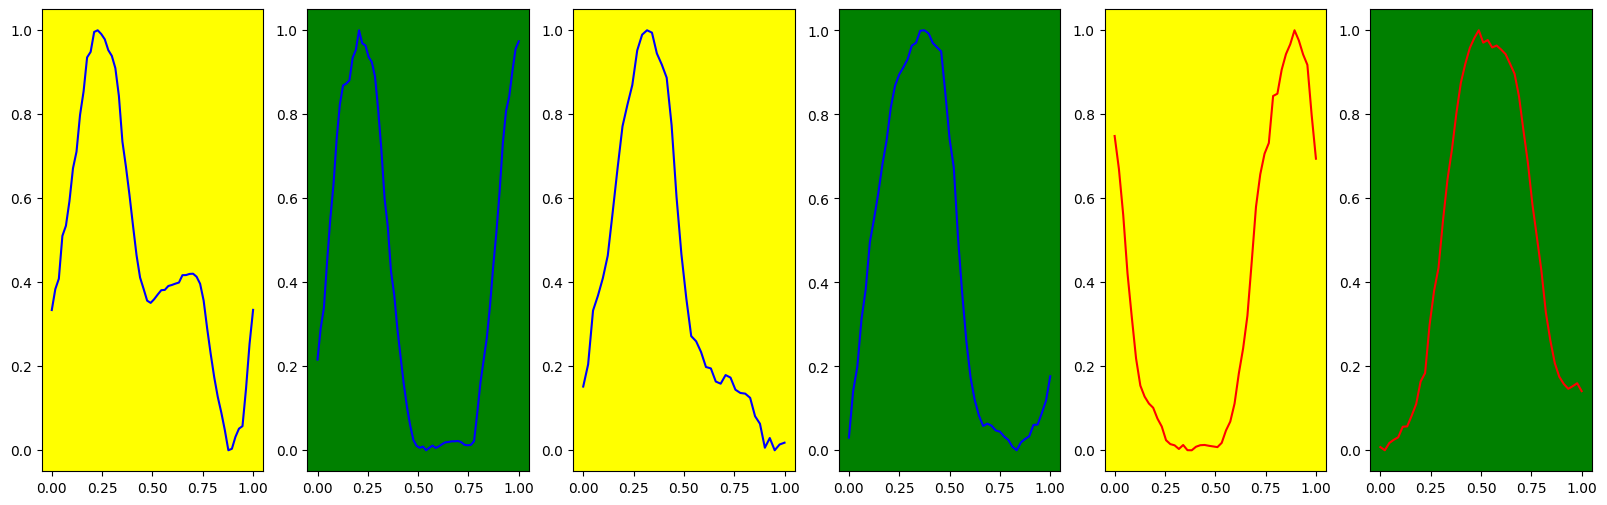

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

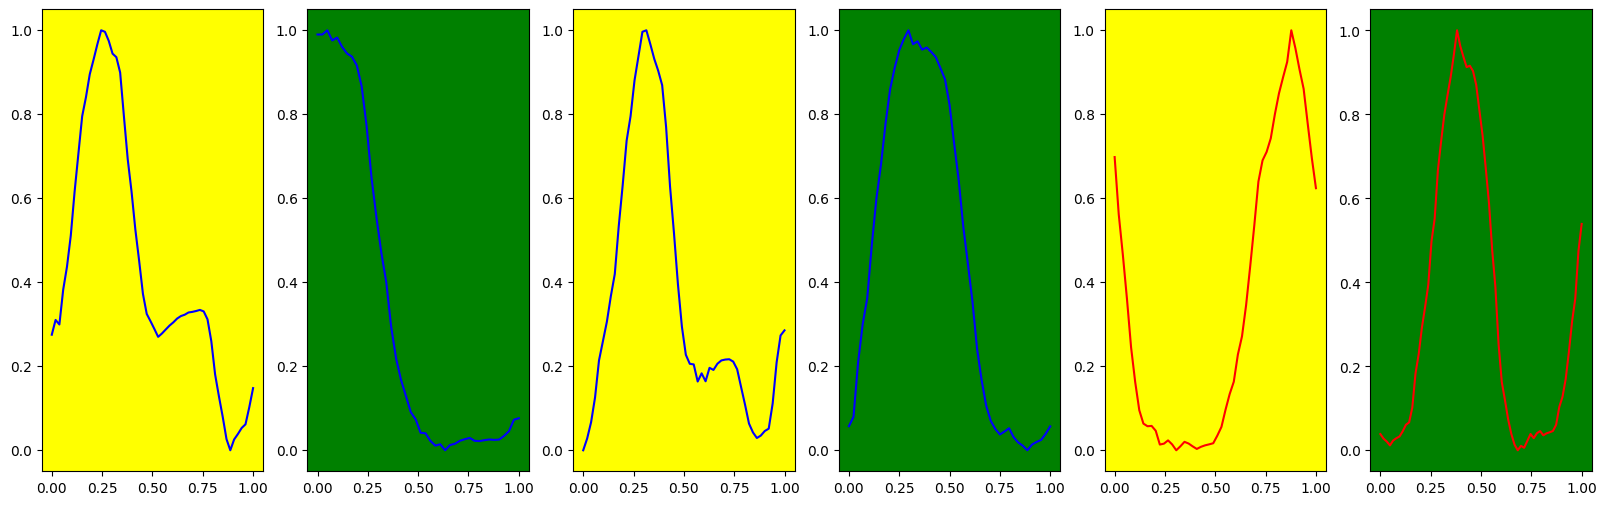

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

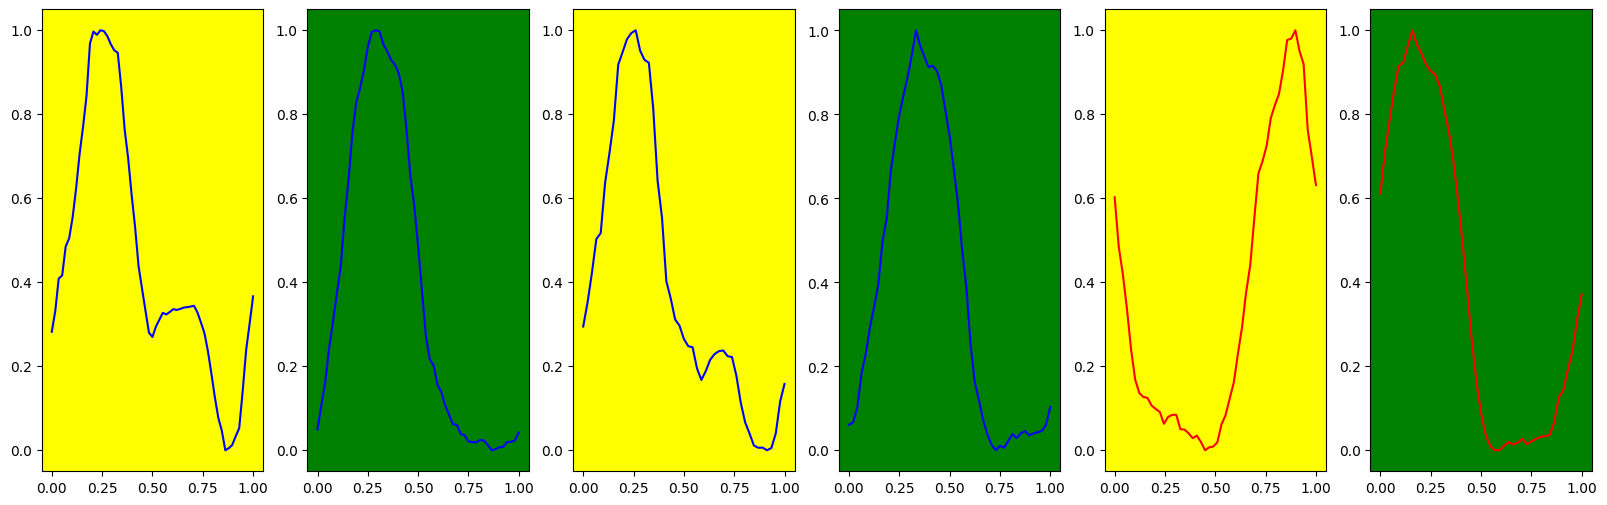

<ipython-input-29-d3a77ec8fa56>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-29-d3a77ec8fa56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-29-d3a77ec8fa56>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

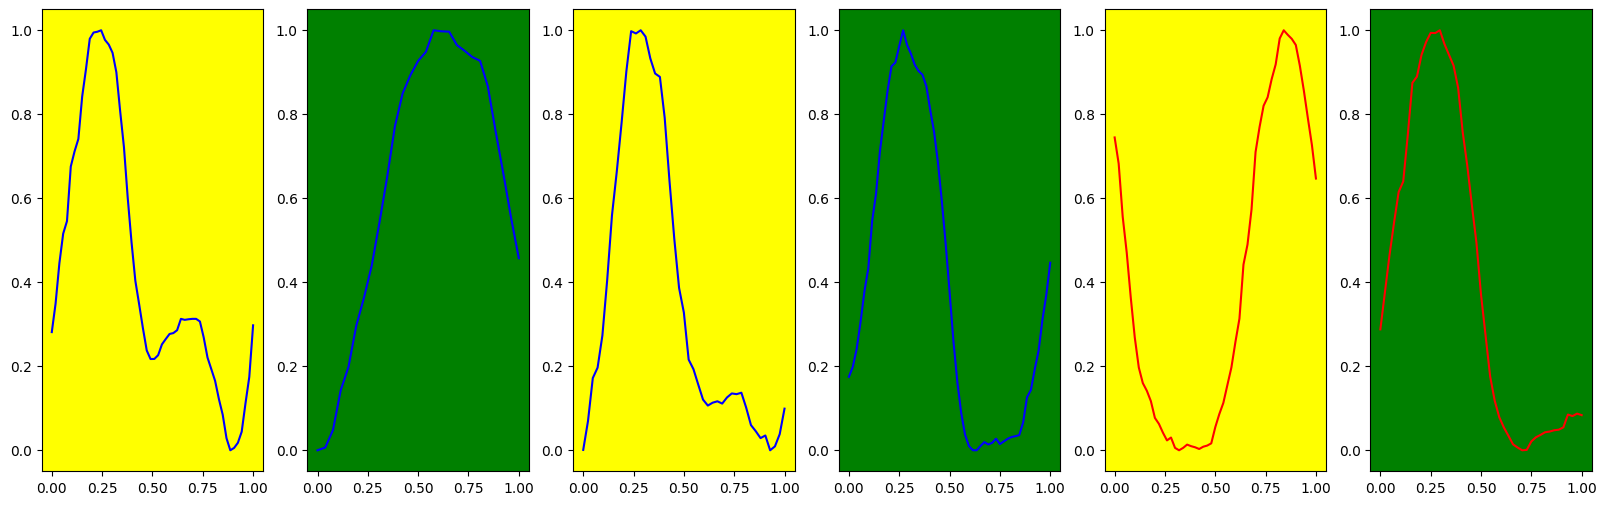

In [ ]:
vect='x_24'
#Вывод каждого повторения
for i in range(len(df_collection)):
 scaler = MinMaxScaler()
 scalerH = MinMaxScaler()
 scaler1 = MinMaxScaler()
 scaler1H = MinMaxScaler()
 scaler2 = MinMaxScaler()
 scaler2H = MinMaxScaler()
 scaler3 = MinMaxScaler()
 scaler3H = MinMaxScaler()
 scaler4 = MinMaxScaler()
 scaler4H = MinMaxScaler()
 scaler5 = MinMaxScaler()
 scaler5H = MinMaxScaler()




 df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
 df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
#  df_collection.get(i).plot(x='frame#', y=[
#                       vect])
#  plt.title('Повторение_'+str((i+2)))
#  plt.show()
 dfMax_collection.get(i)[['frame#']]=scaler1.fit_transform(dfMax_collection.get(i)[['frame#']])
 dfMax_collection.get(i)[[vect]]=scaler1H.fit_transform(dfMax_collection.get(i)[[vect]])

 dfAndr2_collection.get(i)[['frame#']]=scaler2.fit_transform(dfAndr2_collection.get(i)[['frame#']])
 dfAndr2_collection.get(i)[[vect]]=scaler2H.fit_transform(dfAndr2_collection.get(i)[[vect]])

 dfMax2_collection.get(i)[['frame#']]=scaler3.fit_transform(dfMax2_collection.get(i)[['frame#']])
 dfMax2_collection.get(i)[[vect]]=scaler3H.fit_transform(dfMax2_collection.get(i)[[vect]])

 dfAndr3_collection.get(i)[['frame#']]=scaler4.fit_transform(dfAndr3_collection.get(i)[['frame#']])
 dfAndr3_collection.get(i)[[vect]]=scaler4H.fit_transform(dfAndr3_collection.get(i)[[vect]])

 dfMax3_collection.get(i)[['frame#']]=scaler5.fit_transform(dfMax3_collection.get(i)[['frame#']])
 dfMax3_collection.get(i)[[vect]]=scaler5H.fit_transform(dfMax3_collection.get(i)[[vect]])


#  dfMax_collection.get(i).plot(x='frame#', y=[
#                       vect])
 fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, sharex=False,
                                    figsize=(20, 6))
 ax0.plot(df_collection.get(i)['frame#'].to_numpy(),df_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 1')
 ax0.set_facecolor("yellow")
 ax1.plot(dfMax_collection.get(i)['frame#'].to_numpy(), dfMax_collection.get(i)[vect].to_numpy(),  c='blue', label='Повторение_'+str((i+2))+' Максим 1')
 ax1.set_facecolor("green")
 ax2.plot(dfAndr2_collection.get(i)['frame#'].to_numpy(), dfAndr2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 2')
 ax2.set_facecolor("yellow")
 ax3.plot(dfMax2_collection.get(i)['frame#'].to_numpy(), dfMax2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Максим 2')
 ax3.set_facecolor("green")
 ax4.plot(dfAndr3_collection.get(i)['frame#'].to_numpy(), dfAndr3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Андрей 3')
 ax4.set_facecolor("yellow")
 ax5.plot(dfMax3_collection.get(i)['frame#'].to_numpy(), dfMax3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Максим 3')
 ax5.set_facecolor("green")
#  plt.title('Повторение_'+str((i+2)))
 plt.show()

In [ ]:
#Сегментируем датасет по выбранным пиковым точкам и записываем сегменты в коллекцию
df_collection={}
for i in range(len(peaks_1)-1):
 df_collection.update({i:df[peaks_1[i]:(peaks_1[i+1]+1)]})
dfMax_collection={}
for i in range(len(peaks_2)-1):
 dfMax_collection.update({i:df_Max[peaks_2[i]:(peaks_2[i+1]+1)]})
dfAndr2_collection={}
for i in range(len(peaks_3)-1):
 dfAndr2_collection.update({i:df_Andr2[peaks_3[i]:(peaks_3[i+1]+1)]})
dfMax2_collection={}
for i in range(len(peaks_4)-1):
 dfMax2_collection.update({i:df_Max2[peaks_4[i]:(peaks_4[i+1]+1)]})
dfAndr3_collection={}
for i in range(len(peaks_5)-1):
 dfAndr3_collection.update({i:df_Andr3[peaks_5[i]:(peaks_5[i+1]+1)]})
dfMax3_collection={}
for i in range(len(peaks_6)-1):
 dfMax3_collection.update({i:df_Max2[peaks_6[i]:(peaks_6[i+1]+1)]})

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

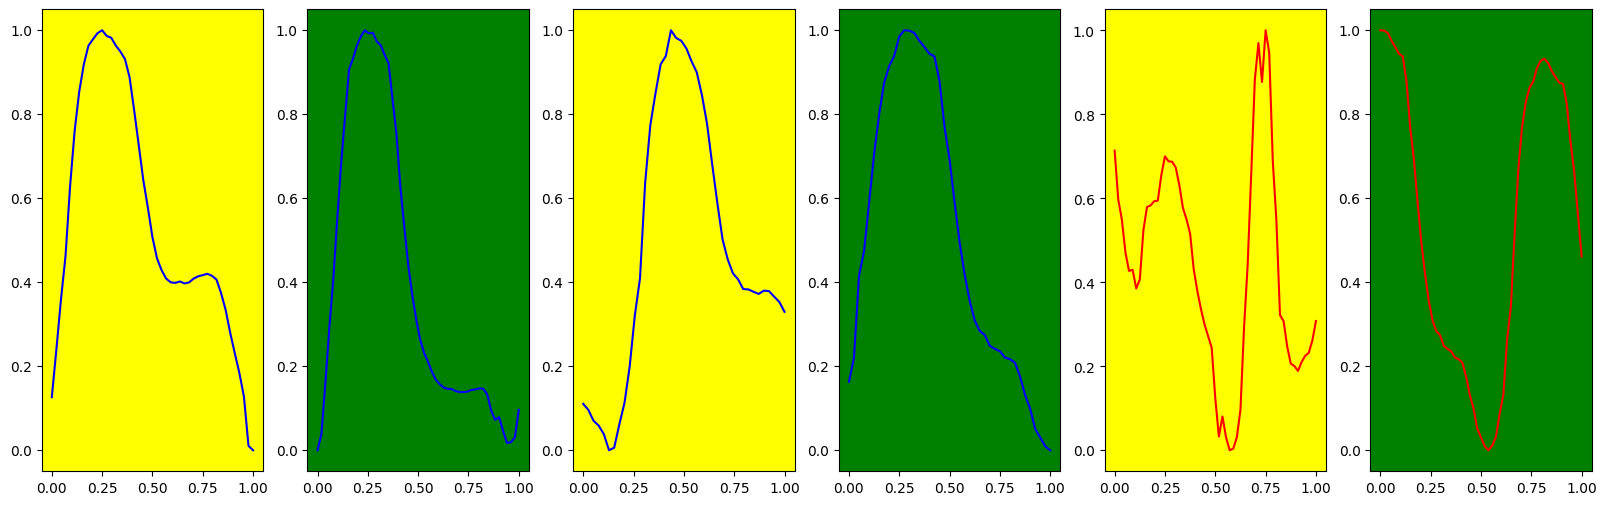

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

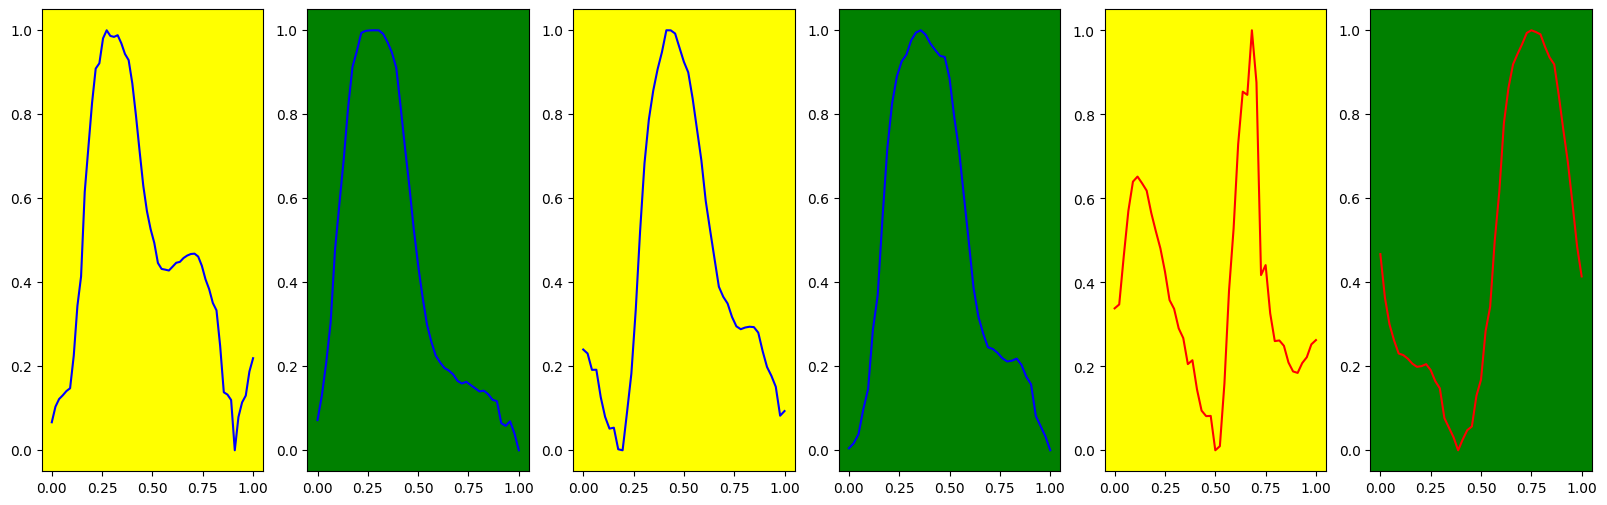

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

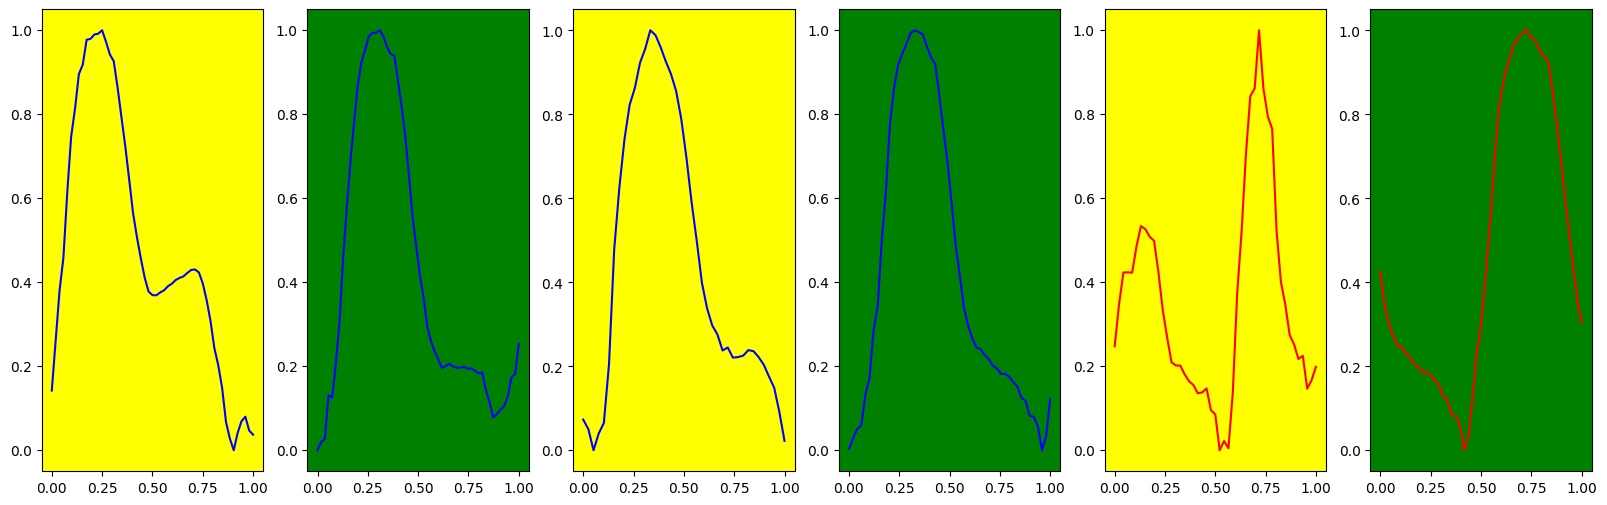

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

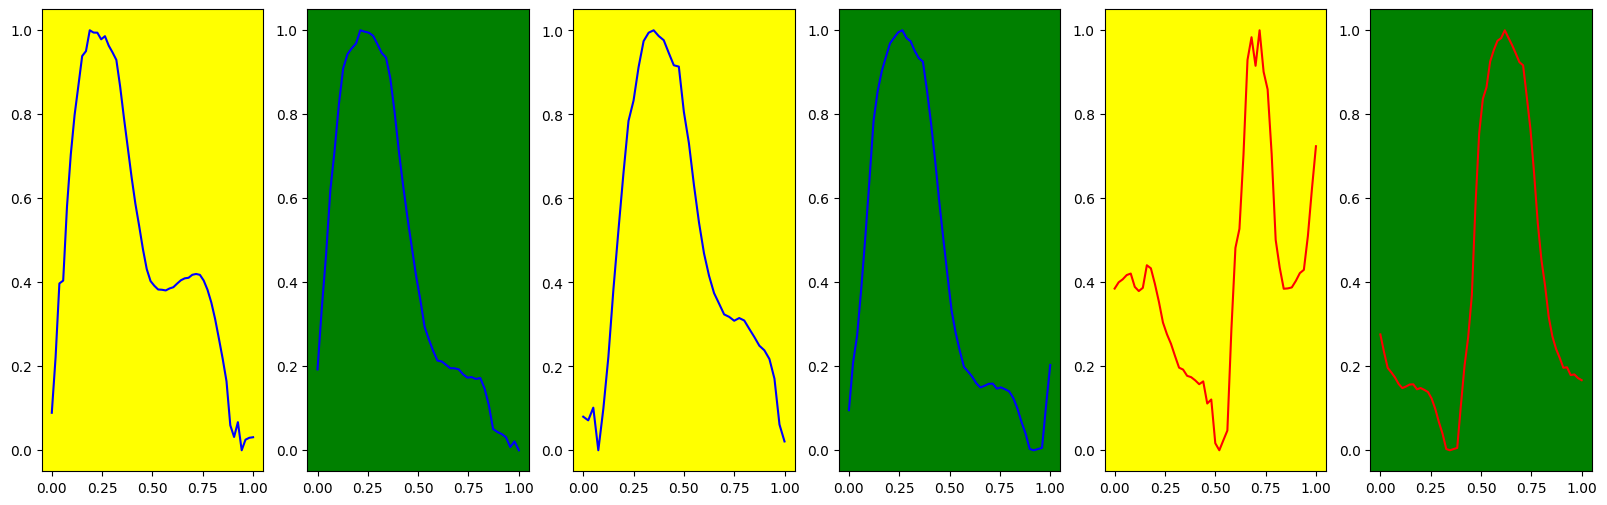

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

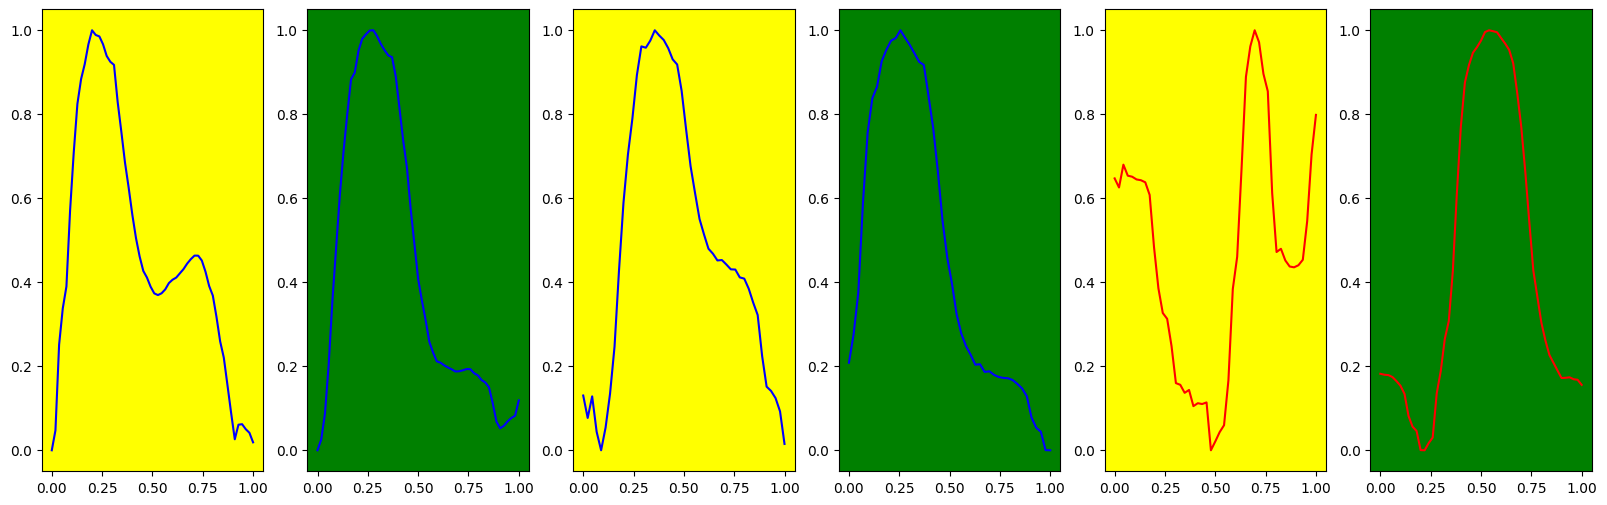

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

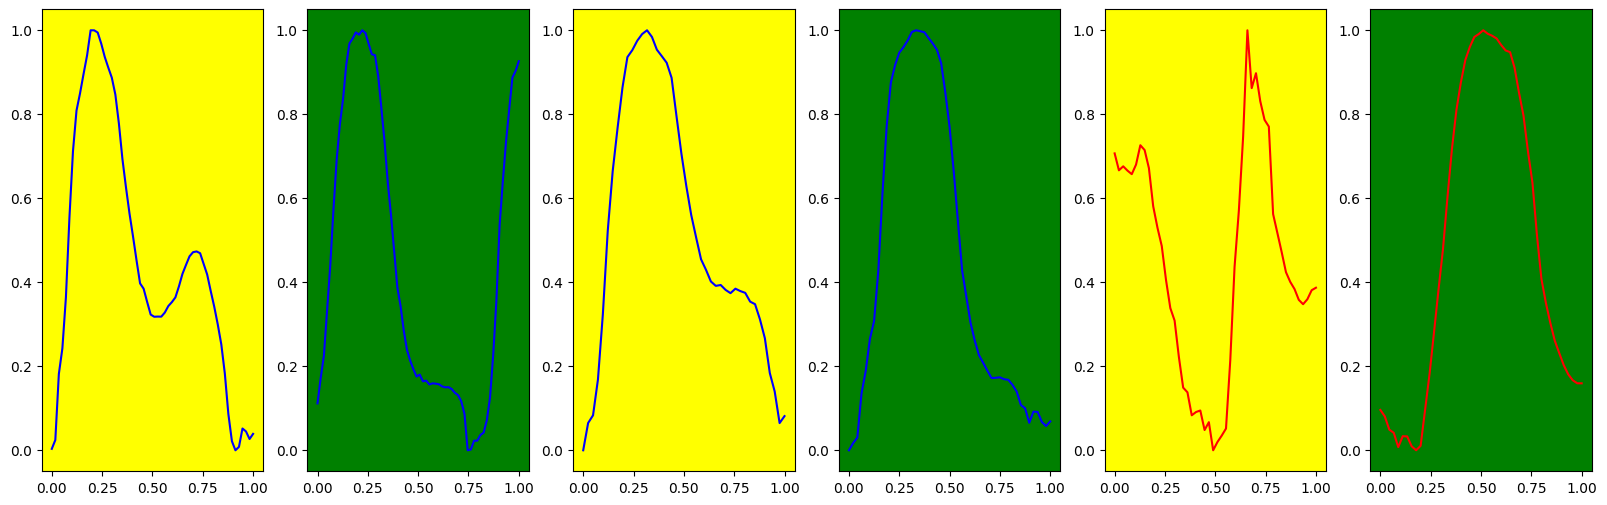

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

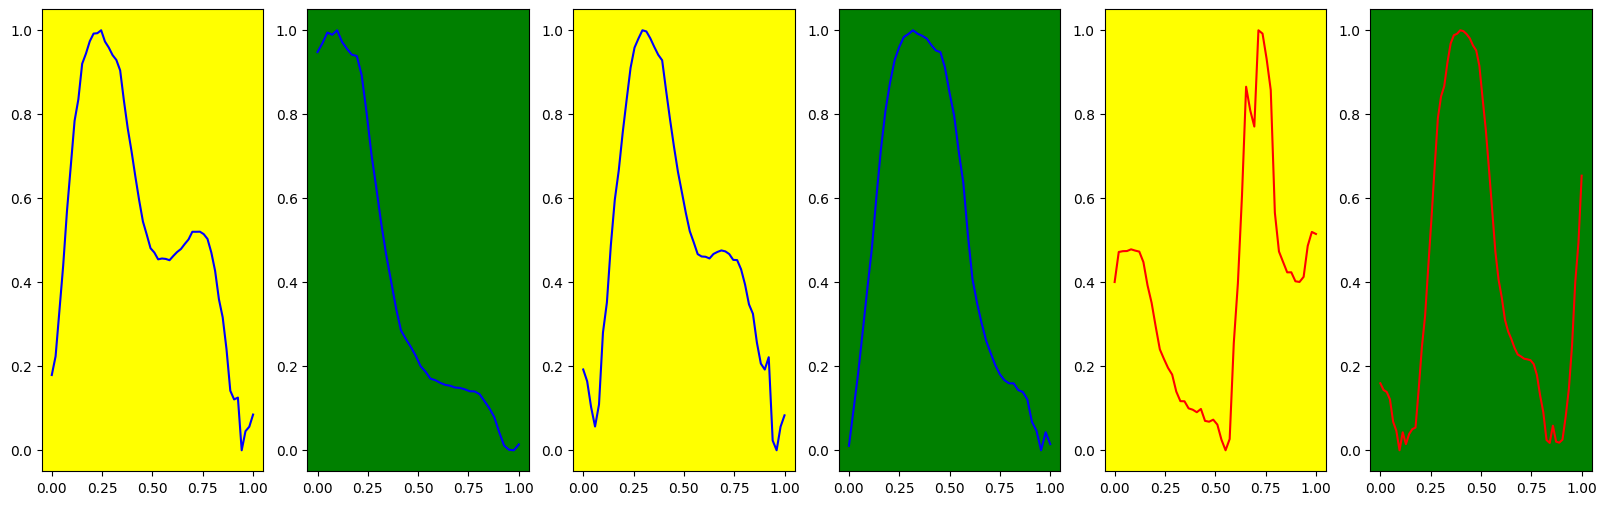

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

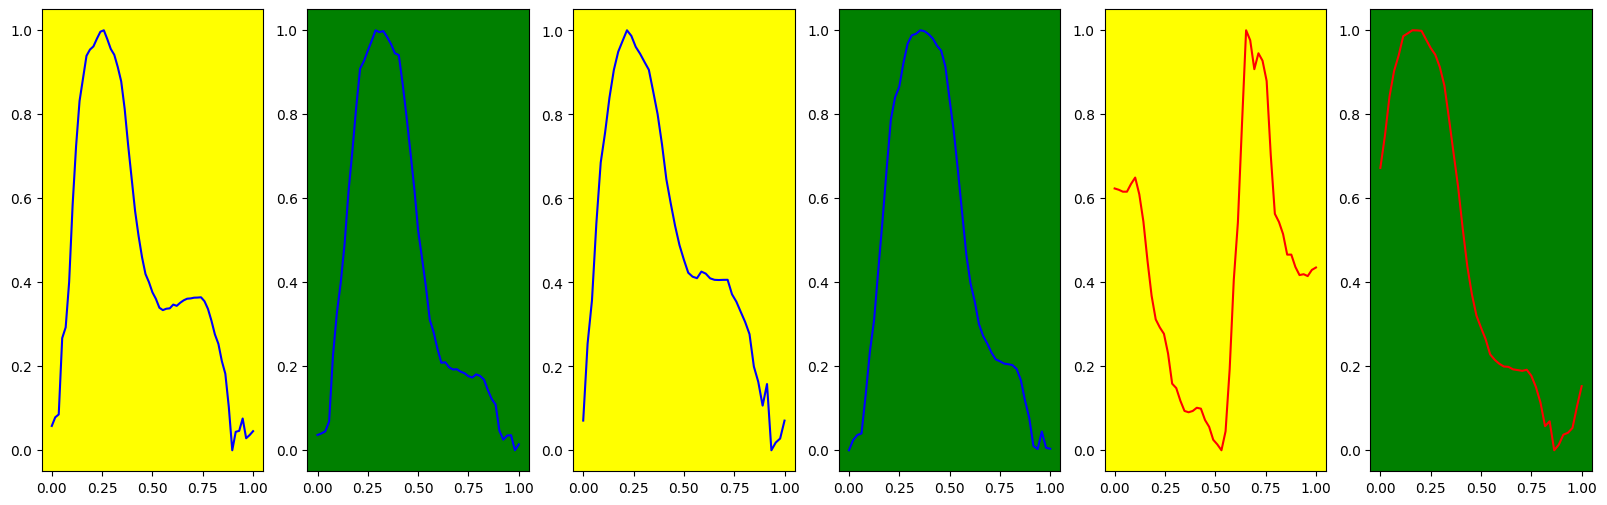

<ipython-input-31-ba877d0b2b80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-31-ba877d0b2b80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-31-ba877d0b2b80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

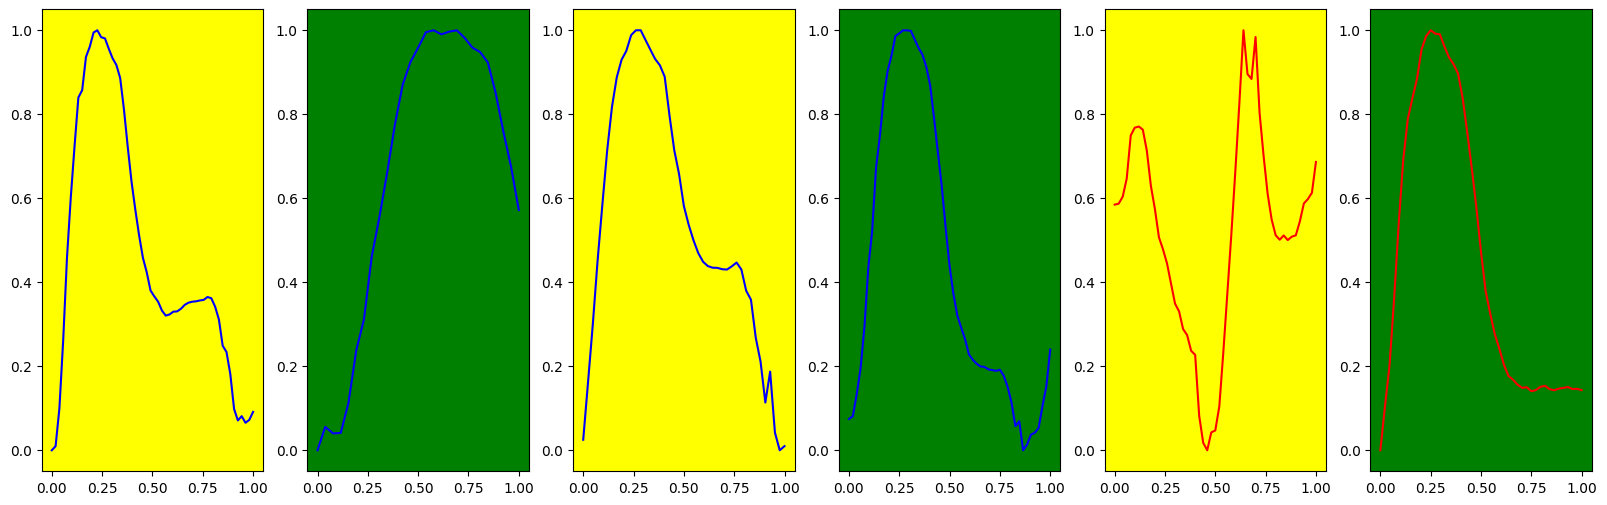

In [ ]:
vect='x_11'
#Вывод каждого повторения
for i in range(len(df_collection)):
 scaler = MinMaxScaler()
 scalerH = MinMaxScaler()
 scaler1 = MinMaxScaler()
 scaler1H = MinMaxScaler()
 scaler2 = MinMaxScaler()
 scaler2H = MinMaxScaler()
 scaler3 = MinMaxScaler()
 scaler3H = MinMaxScaler()
 scaler4 = MinMaxScaler()
 scaler4H = MinMaxScaler()
 scaler5 = MinMaxScaler()
 scaler5H = MinMaxScaler()




 df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
 df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
#  df_collection.get(i).plot(x='frame#', y=[
#                       vect])
#  plt.title('Повторение_'+str((i+2)))
#  plt.show()
 dfMax_collection.get(i)[['frame#']]=scaler1.fit_transform(dfMax_collection.get(i)[['frame#']])
 dfMax_collection.get(i)[[vect]]=scaler1H.fit_transform(dfMax_collection.get(i)[[vect]])

 dfAndr2_collection.get(i)[['frame#']]=scaler2.fit_transform(dfAndr2_collection.get(i)[['frame#']])
 dfAndr2_collection.get(i)[[vect]]=scaler2H.fit_transform(dfAndr2_collection.get(i)[[vect]])

 dfMax2_collection.get(i)[['frame#']]=scaler3.fit_transform(dfMax2_collection.get(i)[['frame#']])
 dfMax2_collection.get(i)[[vect]]=scaler3H.fit_transform(dfMax2_collection.get(i)[[vect]])

 dfAndr3_collection.get(i)[['frame#']]=scaler4.fit_transform(dfAndr3_collection.get(i)[['frame#']])
 dfAndr3_collection.get(i)[[vect]]=scaler4H.fit_transform(dfAndr3_collection.get(i)[[vect]])

 dfMax3_collection.get(i)[['frame#']]=scaler5.fit_transform(dfMax3_collection.get(i)[['frame#']])
 dfMax3_collection.get(i)[[vect]]=scaler5H.fit_transform(dfMax3_collection.get(i)[[vect]])


#  dfMax_collection.get(i).plot(x='frame#', y=[
#                       vect])
 fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, sharex=False,
                                    figsize=(20, 6))
 ax0.plot(df_collection.get(i)['frame#'].to_numpy(),df_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 1')
 ax0.set_facecolor("yellow")
 ax1.plot(dfMax_collection.get(i)['frame#'].to_numpy(), dfMax_collection.get(i)[vect].to_numpy(),  c='blue', label='Повторение_'+str((i+2))+' Максим 1')
 ax1.set_facecolor("green")
 ax2.plot(dfAndr2_collection.get(i)['frame#'].to_numpy(), dfAndr2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 2')
 ax2.set_facecolor("yellow")
 ax3.plot(dfMax2_collection.get(i)['frame#'].to_numpy(), dfMax2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Максим 2')
 ax3.set_facecolor("green")
 ax4.plot(dfAndr3_collection.get(i)['frame#'].to_numpy(), dfAndr3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Андрей 3')
 ax4.set_facecolor("yellow")
 ax5.plot(dfMax3_collection.get(i)['frame#'].to_numpy(), dfMax3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Максим 3')
 ax5.set_facecolor("green")
#  plt.title('Повторение_'+str((i+2)))
 plt.show()

In [ ]:
#Сегментируем датасет по выбранным пиковым точкам и записываем сегменты в коллекцию
df_collection={}
for i in range(len(peaks_1)-1):
 df_collection.update({i:df[peaks_1[i]:(peaks_1[i+1]+1)]})
dfMax_collection={}
for i in range(len(peaks_2)-1):
 dfMax_collection.update({i:df_Max[peaks_2[i]:(peaks_2[i+1]+1)]})
dfAndr2_collection={}
for i in range(len(peaks_3)-1):
 dfAndr2_collection.update({i:df_Andr2[peaks_3[i]:(peaks_3[i+1]+1)]})
dfMax2_collection={}
for i in range(len(peaks_4)-1):
 dfMax2_collection.update({i:df_Max2[peaks_4[i]:(peaks_4[i+1]+1)]})
dfAndr3_collection={}
for i in range(len(peaks_5)-1):
 dfAndr3_collection.update({i:df_Andr3[peaks_5[i]:(peaks_5[i+1]+1)]})
dfMax3_collection={}
for i in range(len(peaks_6)-1):
 dfMax3_collection.update({i:df_Max2[peaks_6[i]:(peaks_6[i+1]+1)]})

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

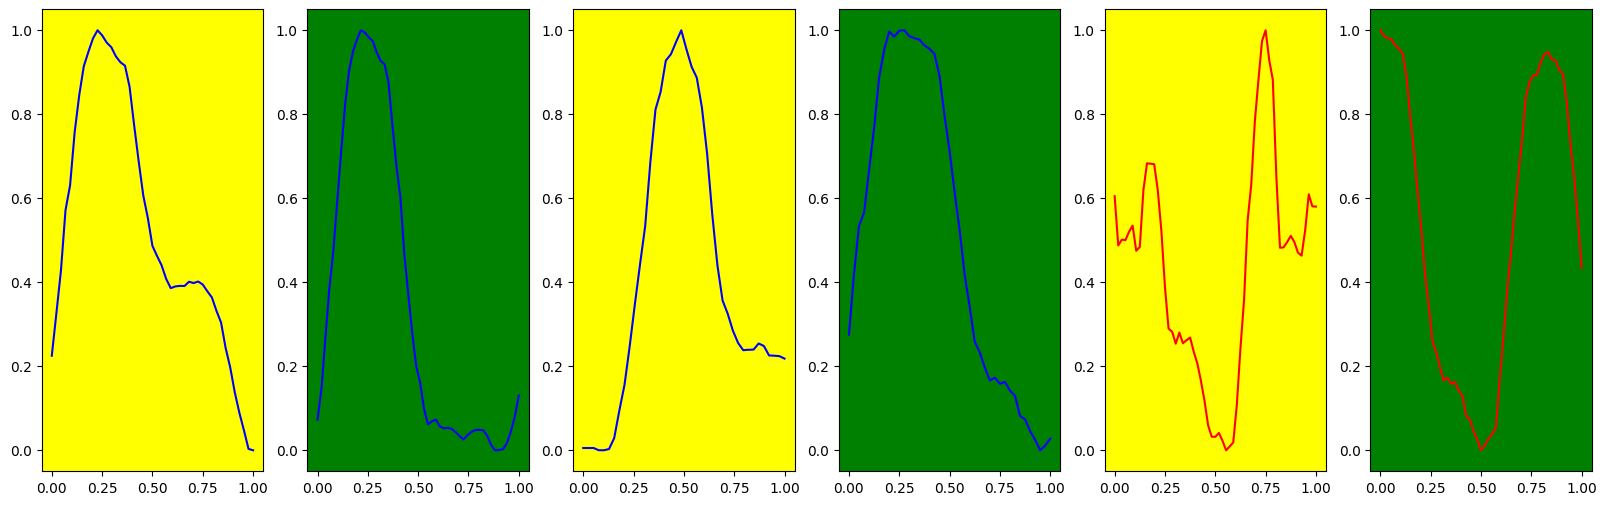

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

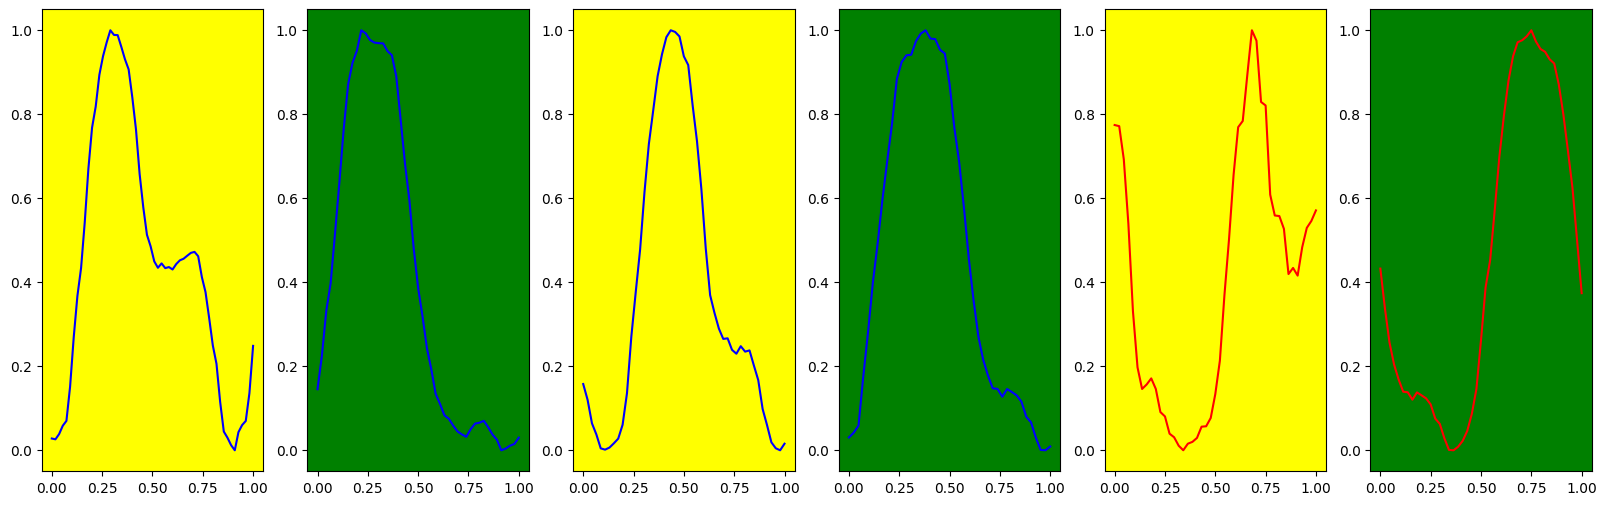

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

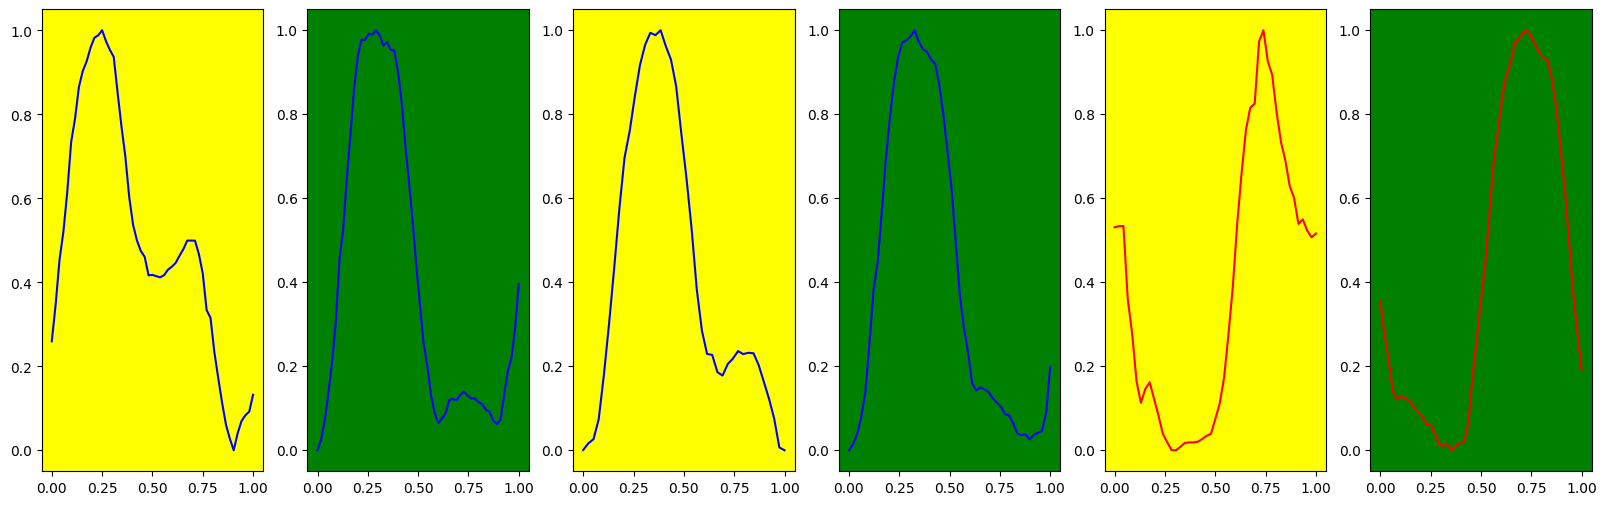

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

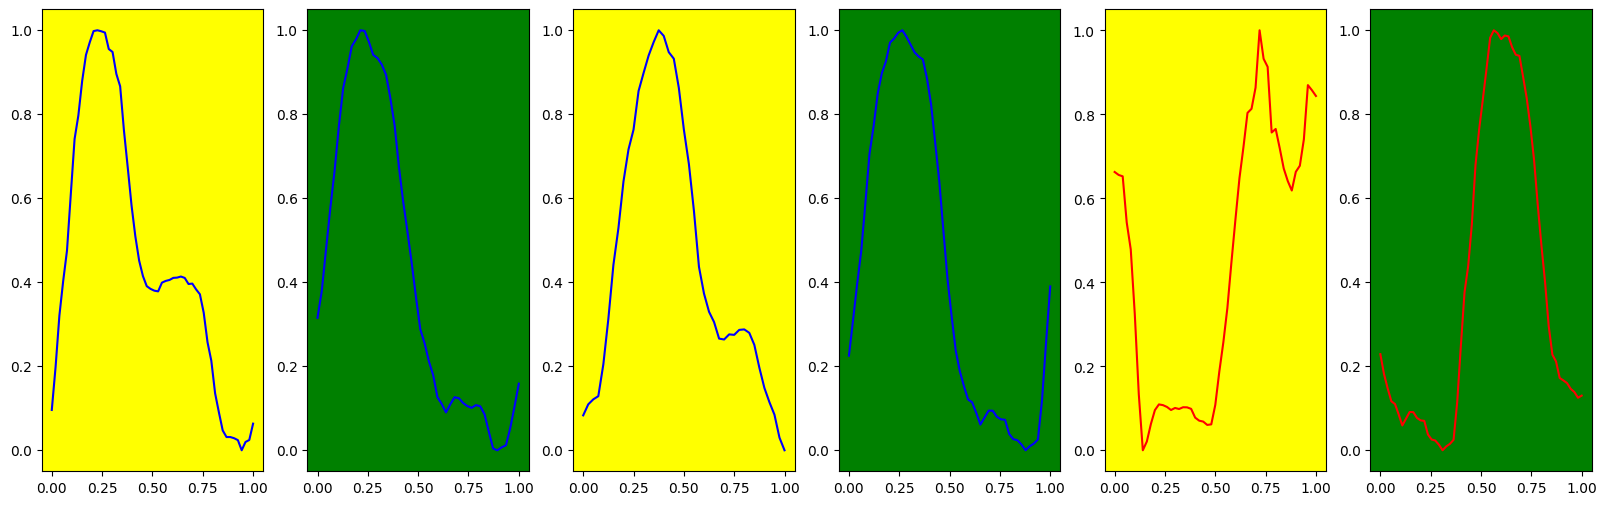

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

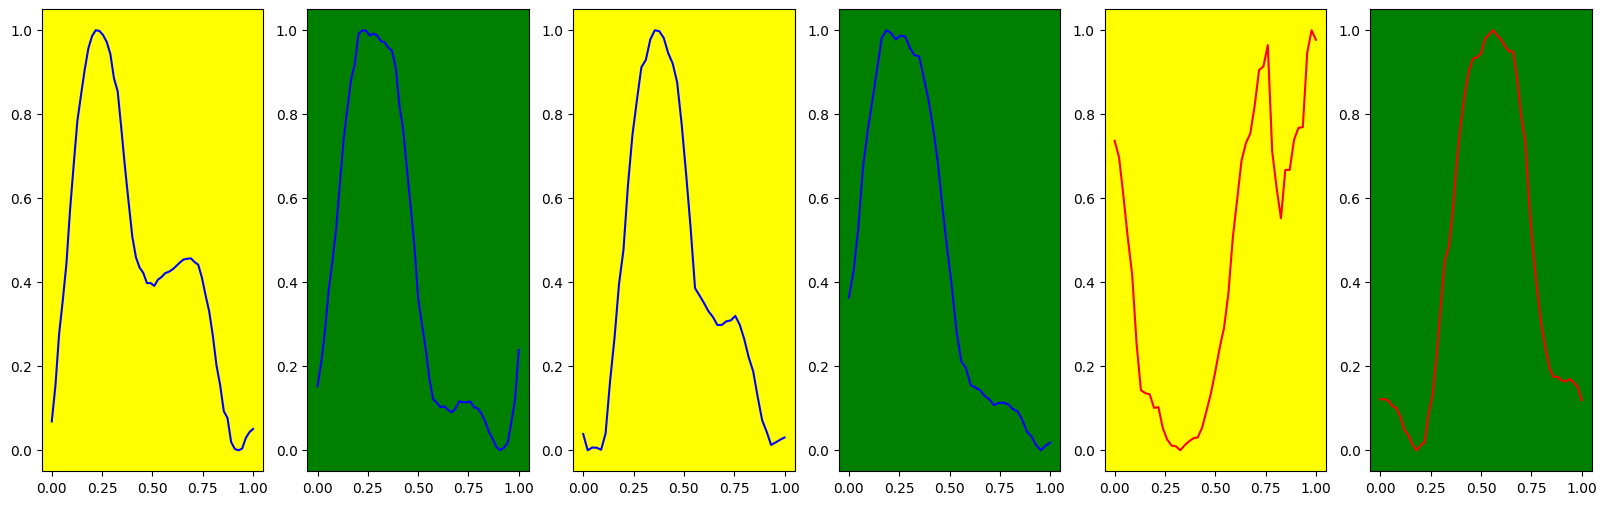

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

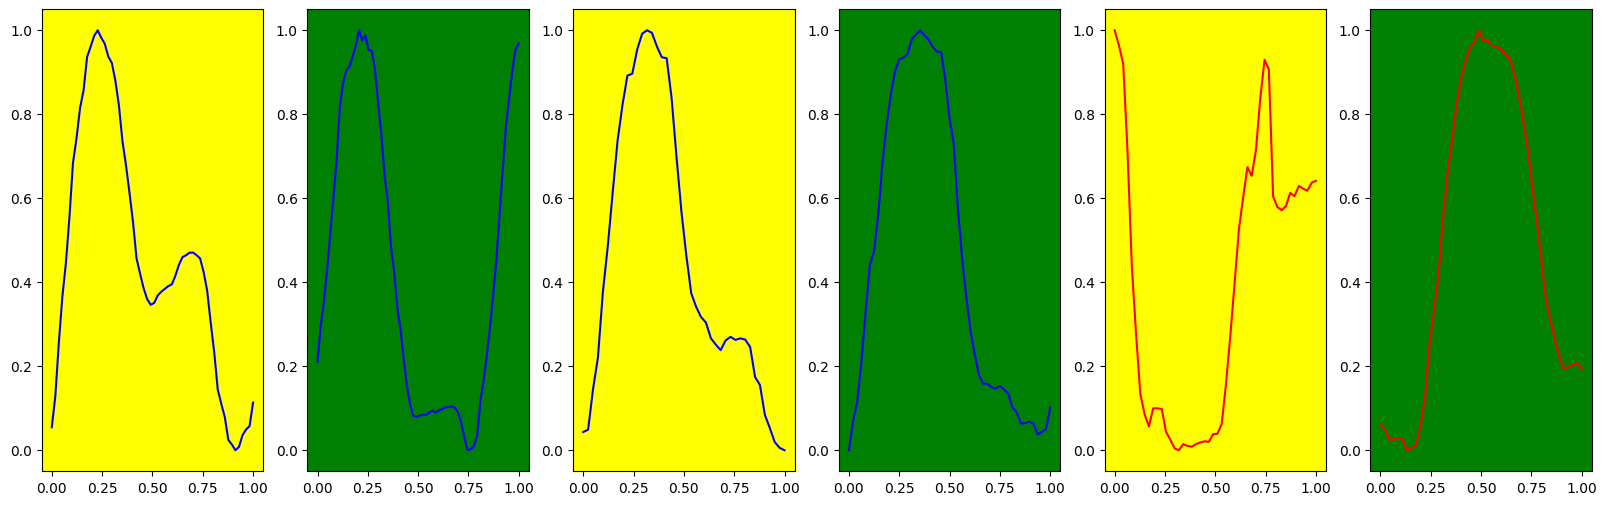

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

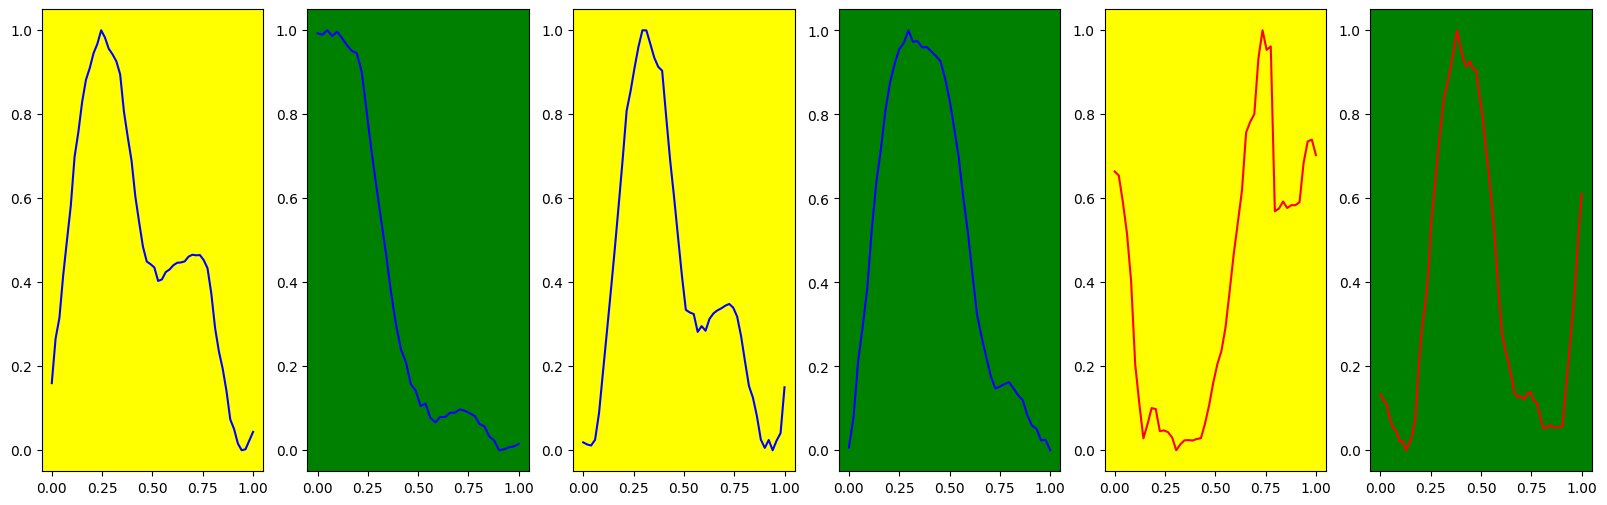

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

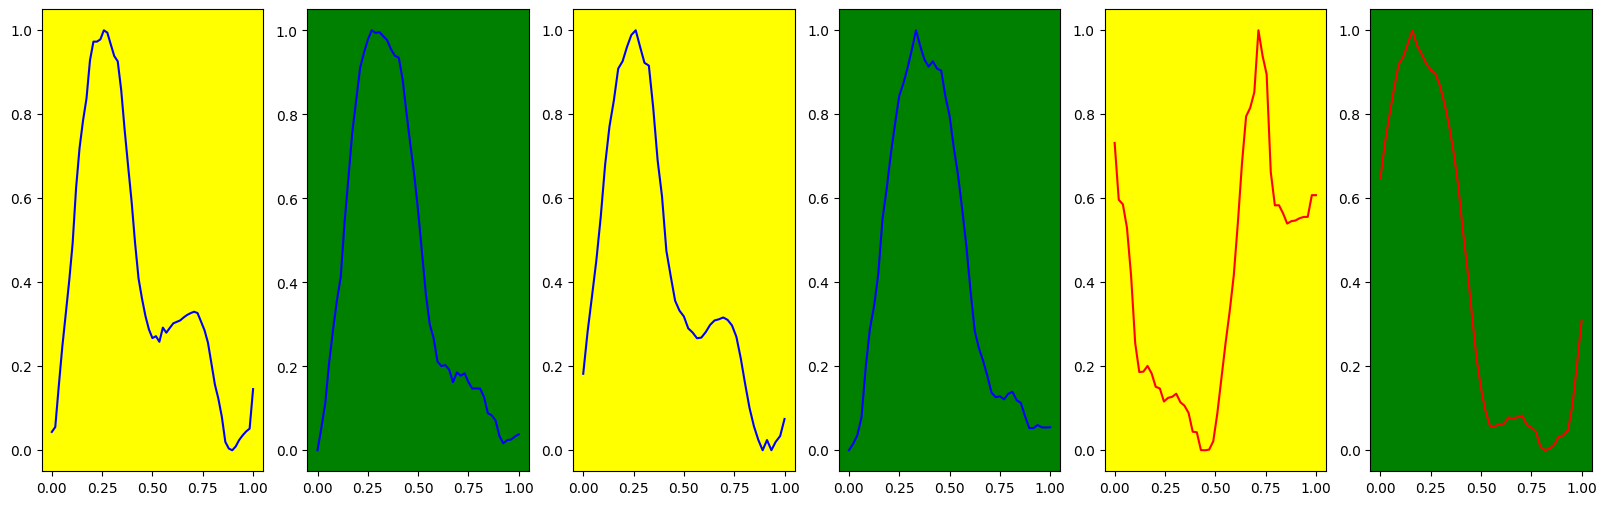

<ipython-input-33-07f2159d4de3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
<ipython-input-33-07f2159d4de3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
<ipython-input-33-07f2159d4de3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

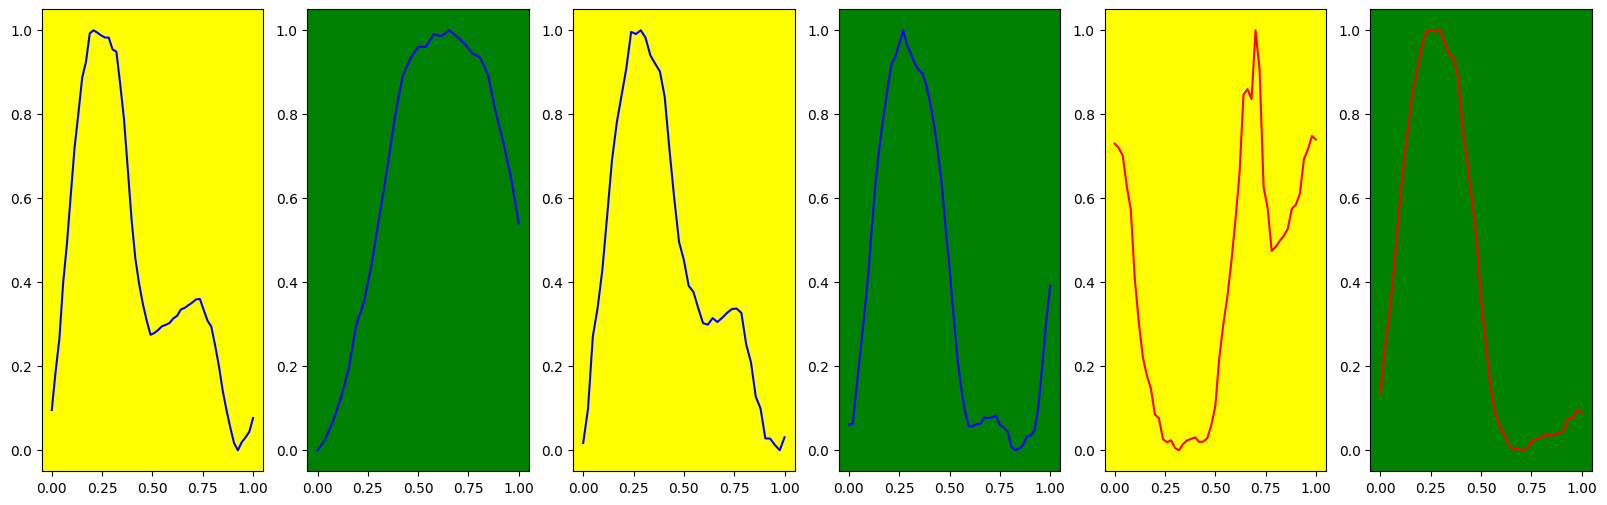

In [ ]:
vect='x_23'
#Вывод каждого повторения
for i in range(len(df_collection)):
 scaler = MinMaxScaler()
 scalerH = MinMaxScaler()
 scaler1 = MinMaxScaler()
 scaler1H = MinMaxScaler()
 scaler2 = MinMaxScaler()
 scaler2H = MinMaxScaler()
 scaler3 = MinMaxScaler()
 scaler3H = MinMaxScaler()
 scaler4 = MinMaxScaler()
 scaler4H = MinMaxScaler()
 scaler5 = MinMaxScaler()
 scaler5H = MinMaxScaler()




 df_collection.get(i)[['frame#']]=scaler.fit_transform(df_collection.get(i)[['frame#']])
 df_collection.get(i)[[vect]]=scalerH.fit_transform(df_collection.get(i)[[vect]])
#  df_collection.get(i).plot(x='frame#', y=[
#                       vect])
#  plt.title('Повторение_'+str((i+2)))
#  plt.show()
 dfMax_collection.get(i)[['frame#']]=scaler1.fit_transform(dfMax_collection.get(i)[['frame#']])
 dfMax_collection.get(i)[[vect]]=scaler1H.fit_transform(dfMax_collection.get(i)[[vect]])

 dfAndr2_collection.get(i)[['frame#']]=scaler2.fit_transform(dfAndr2_collection.get(i)[['frame#']])
 dfAndr2_collection.get(i)[[vect]]=scaler2H.fit_transform(dfAndr2_collection.get(i)[[vect]])

 dfMax2_collection.get(i)[['frame#']]=scaler3.fit_transform(dfMax2_collection.get(i)[['frame#']])
 dfMax2_collection.get(i)[[vect]]=scaler3H.fit_transform(dfMax2_collection.get(i)[[vect]])

 dfAndr3_collection.get(i)[['frame#']]=scaler4.fit_transform(dfAndr3_collection.get(i)[['frame#']])
 dfAndr3_collection.get(i)[[vect]]=scaler4H.fit_transform(dfAndr3_collection.get(i)[[vect]])

 dfMax3_collection.get(i)[['frame#']]=scaler5.fit_transform(dfMax3_collection.get(i)[['frame#']])
 dfMax3_collection.get(i)[[vect]]=scaler5H.fit_transform(dfMax3_collection.get(i)[[vect]])


#  dfMax_collection.get(i).plot(x='frame#', y=[
#                       vect])
 fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, sharex=False,
                                    figsize=(20, 6))
 ax0.plot(df_collection.get(i)['frame#'].to_numpy(),df_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 1')
 ax0.set_facecolor("yellow")
 ax1.plot(dfMax_collection.get(i)['frame#'].to_numpy(), dfMax_collection.get(i)[vect].to_numpy(),  c='blue', label='Повторение_'+str((i+2))+' Максим 1')
 ax1.set_facecolor("green")
 ax2.plot(dfAndr2_collection.get(i)['frame#'].to_numpy(), dfAndr2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Андрей 2')
 ax2.set_facecolor("yellow")
 ax3.plot(dfMax2_collection.get(i)['frame#'].to_numpy(), dfMax2_collection.get(i)[vect].to_numpy(), c='blue', label='Повторение_'+str((i+2))+' Максим 2')
 ax3.set_facecolor("green")
 ax4.plot(dfAndr3_collection.get(i)['frame#'].to_numpy(), dfAndr3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Андрей 3')
 ax4.set_facecolor("yellow")
 ax5.plot(dfMax3_collection.get(i)['frame#'].to_numpy(), dfMax3_collection.get(i)[vect].to_numpy(),  c='red', label='Повторение_'+str((i+2))+' Максим 3')
 ax5.set_facecolor("green")
#  plt.title('Повторение_'+str((i+2)))
 plt.show()

Предпологается что модель обученная на данных размеченных на такие паттерны при анализе видео в продакшене будет определять в том числе веротность принадлежности координаты скелетной точки к той или иной фазе удара (каждый патерн можно дополнительно разметить например на восходящую и нисходящую фазы). Это может помочь уменьшить влияние различной скорости у разных спортсменов. При этом, нужно нормализовать значения кадров в каждом паттерне - перейти от дискретных значений кадров к непрерывным.